In [ ]:
!pip install scikit-learn
!pip install rank_bm25

# Basic Tokenization, Embeddings and Similarity Matching Using 5 Documents

Let's break down each search technique used in the code and understand how it works, including simplified formulas and the expected output based on the small dataset provided.

**Important Note:** The output shown below is based on the specific, very small dataset used in the code (`documents` and `queries`). The performance and ranking of these methods would likely differ significantly on a larger, more diverse dataset.

### 1. BM25 (Okapi BM25) - Lexical Search

BM25 is a ranking function used to estimate the relevance of documents to a given search query. It's primarily a lexical search method, meaning it focuses on the presence and frequency of terms in both the query and the document.

**Simplified Formula Concept:**

BM25 considers several factors for each term in the query:

*   **Term Frequency (TF):** How often the term appears in the document.
*   **Inverse Document Frequency (IDF):** How rare the term is across all documents (rarer terms are more important).
*   **Document Length:** Longer documents are penalized to avoid unfairly high scores just because they contain more words.

A simplified idea of the score for a document given a query is the sum of the weighted scores for each query term present in the document:

$$
\text{Score}(D, Q) = \sum_{i=1}^{n} \text{IDF}(q_i) \cdot \frac{\text{TF}(q_i, D) \cdot (k_1 + 1)}{\text{TF}(q_i, D) + k_1 \cdot (1 - b + b \cdot \frac{|D|}{\text{avgdl}})}
$$

Where:
*   $D$ is the document, $Q$ is the query.
*   $q_i$ is the i-th term in the query.
*   $\text{TF}(q_i, D)$ is the term frequency of $q_i$ in document $D$.
*   $\text{IDF}(q_i)$ is the inverse document frequency of $q_i$.
*   $|D|$ is the length of document $D$.
*   $\text{avgdl}$ is the average document length in the collection.
*   $k_1$ and $b$ are tuning parameters (typically $k_1$ is between 1.2 and 2.0, and $b$ is around 0.75).

**Expected Output for BM25:**

Based on the code execution with the given data:

*   **Query: "learn python basics"**
    *   The terms "python", "learn" and "basics" are considered. "Python" appears in multiple documents. "learn" and "basics" are less common in this small dataset.
    *   Doc4 ("Installing Python packages can be done with pip.") and Doc1 ("Python is a popular programming language for beginners.") are expected to have higher scores due to the presence of "python". Doc1 also contains "beginners" which is semantically related to "learn" and "basics", although BM25 is primarily lexical.
    *   The ranking will prioritize documents with the query terms, considering their frequency and rarity.

*   **Query: "install packages"**
    *   The terms "install" and "packages" are considered.
    *   Doc4 ("Installing Python packages can be done with pip.") is expected to have the highest score as it contains both terms.
    *   Other documents are expected to have low or zero scores for this query.

### 2. TF-IDF + Cosine Similarity - Basic Semantic Search

TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic used to reflect how important a word is to a document in a collection or corpus. Cosine similarity is then used to measure the similarity between two non-zero vectors in an inner product space. In this context, it measures the similarity between the TF-IDF vector of the query and the TF-IDF vector of each document. While TF-IDF itself is based on term frequency (lexical), using cosine similarity with TF-IDF vectors introduces a basic form of semantic comparison by looking at the overall distribution of terms.

**Simplified Formula Concept:**

*   **TF (Term Frequency):** The number of times a term appears in a document. A common way to calculate it is:
    $$
    \text{TF}(t, D) = \text{count of term } t \text{ in document } D
    $$
    Sometimes normalized by document length.
*   **IDF (Inverse Document Frequency):** Measures how much information the word provides, i.e., if it's common or rare across all documents.
    $$
    \text{IDF}(t, N) = \log\left(\frac{N}{\text{count of documents containing term } t}\right)
    $$
    Where $N$ is the total number of documents.
*   **TF-IDF Score:** The product of TF and IDF.
    $$
    \text{TF-IDF}(t, D, N) = \text{TF}(t, D) \cdot \text{IDF}(t, N)
    $$
*   **Cosine Similarity:** Measures the cosine of the angle between two vectors. A score of 1 means the vectors are identical in direction, 0 means they are orthogonal (no similarity), and -1 means they are diametrically opposed.
    $$
    \text{Cosine Similarity}(A, B) = \frac{A \cdot B}{||A|| \cdot ||B||} = \frac{\sum_{i=1}^{n} A_i B_i}{\sqrt{\sum_{i=1}^{n} A_i^2} \sqrt{\sum_{i=1}^{n} B_i^2}}
    $$
    Where $A$ and $B$ are the TF-IDF vectors of the query and document, respectively.

**Expected Output for TF-IDF + Cosine Similarity:**

Based on the code execution with the given data:

*   **Query: "learn python basics"**
    *   Documents with terms like "python", "learning", "beginners" will have higher TF-IDF scores for these terms.
    *   The cosine similarity will measure how close the term distribution of the query is to each document's term distribution.
    *   Doc1 ("Python is a popular programming language for beginners.") is expected to have a high score due to "python" and "beginners". Doc3 ("Machine learning techniques can be implemented using Python.") and Doc4 ("Installing Python packages can be done with pip.") also contain "python" and related concepts, so they are also likely to rank high.

*   **Query: "install packages"**
    *   Documents containing "install" and "packages" will have higher TF-IDF scores for these terms.
    *   Doc4 ("Installing Python packages can be done with pip.") is expected to have the highest cosine similarity as it directly contains both terms.

### 3. LSA (Latent Semantic Analysis)

LSA is a technique that analyzes relationships between a set of documents and the terms they contain by producing a set of concepts related to the documents and terms. It uses Singular Value Decomposition (SVD) to reduce the dimensionality of the TF-IDF matrix, capturing latent semantic relationships between terms and documents.

**Simplified Concept:**

LSA takes the TF-IDF matrix and applies SVD to decompose it into three matrices. By keeping only the most significant singular values and their corresponding vectors, it creates a lower-dimensional representation of the documents and terms. This lower-dimensional space represents "concepts". Documents and terms that are semantically related, even if they don't share exact terms, will be closer in this LSA space.

*   **TF-IDF Matrix (M):** Documents as rows, terms as columns (or vice versa).
*   **SVD:** Decompose M into $U \Sigma V^T$.
*   **Dimensionality Reduction:** Keep only the top $k$ singular values and corresponding vectors to get $M_k \approx U_k \Sigma_k V_k^T$.
*   **Similarity:** Cosine similarity is then calculated between the query vector (projected into the LSA space) and the document vectors in the LSA space.

**Expected Output for LSA:**

Based on the code execution with the given data and `n_components=2`:

*   **Query: "learn python basics"**
    *   LSA aims to capture underlying themes. With only 2 components and this small dataset, the "concepts" might be very broad.
    *   Documents related to "Python" and potentially "learning" or "machine learning" (which involves learning) might cluster together in the LSA space.
    *   The output shows Doc5, Doc3, and Doc4 ranking high, suggesting these documents are considered semantically similar to the query in the reduced LSA space, likely due to their shared context around "Python" and related technical concepts.

*   **Query: "install packages"**
    *   Documents related to "installing" and "packages" will be closer in the LSA space.
    *   The output shows Doc4 ranking highest, which is expected as it directly addresses installing packages. Doc3 and Doc5 also rank relatively high, possibly because they are also technical documents related to Python, implying a general "Python technical topics" concept captured by LSA.

### 4. Hybrid Search (BM25 + TF-IDF)

Hybrid search combines the strengths of different search techniques. In this case, it combines a lexical method (BM25) with a basic semantic method (TF-IDF + Cosine Similarity). The idea is that lexical search is good at finding exact term matches, while semantic search can find documents with related terms or concepts. By combining their scores, you can potentially get a more comprehensive and accurate ranking.

**Simplified Concept:**

*   Calculate the scores for a query using both BM25 and TF-IDF + Cosine Similarity independently.
*   Normalize the scores from each method to a common scale (e.g., 0 to 1) so they can be combined meaningfully.
*   Combine the normalized scores using a weighting scheme (e.g., 50% BM25, 50% TF-IDF).
*   Rank documents based on the combined score.

$$
\text{Combined Score}(D, Q) = w_1 \cdot \text{Normalize}(\text{BM25 Score}(D, Q)) + w_2 \cdot \text{Normalize}(\text{TF-IDF Score}(D, Q))
$$

Where $w_1$ and $w_2$ are weights (summing to 1). In the code, $w_1 = w_2 = 0.5$.

**Expected Output for Hybrid Search:**

Based on the code execution with the given data and equal weights:

*   **Query: "learn python basics"**
    *   The hybrid approach will balance the lexical matches (from BM25) with the semantic relationships (from TF-IDF).
    *   Doc1 ("Python is a popular programming language for beginners.") ranks highest, likely benefiting from both its lexical match with "python" and semantic relation of "beginners" to "learn basics". Doc4 ("Installing Python packages can be done with pip.") also ranks high due to the "python" match.
    *   The combined score provides a potentially more nuanced ranking than either method alone.

*   **Query: "install packages"**
    *   Doc4 ("Installing Python packages can be done with pip.") is expected to dominate the ranking as it scores highly in both BM25 (exact terms) and TF-IDF (term distribution).
    *   Other documents will have lower combined scores.

This comparison on a small dataset illustrates how different search techniques prioritize documents based on different criteria (exact terms vs. term distribution vs. latent concepts). The hybrid approach attempts to leverage the strengths of multiple methods.

In [ ]:
# Hybrid, Lexical and Semantic Search Comparison

import time
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from rank_bm25 import BM25Okapi

# -------------------------------------------------------------
# Step 1: Prepare documents and queries (simple array for demo)
# -------------------------------------------------------------
documents = [
    "Python is a popular programming language for beginners.",
    "Java is widely used in enterprise software development.",
    "Machine learning techniques can be implemented using Python.",
    "Installing Python packages can be done with pip.",
    "Deep learning frameworks like TensorFlow and PyTorch are based on Python."
]

queries = [
    "learn python basics",
    "install packages"
]

# Initialize lists to store scores for plotting
all_bm25_scores = []
all_tfidf_scores = []
all_lsa_scores = []
all_hybrid_scores = []


# -------------------------------------------------------------
# Step 2: BM25 (lexical search)
# -------------------------------------------------------------
tokenized_docs = [doc.lower().split() for doc in documents]
bm25 = BM25Okapi(tokenized_docs)

print("--- BM25 Process ---")
for query in queries:
    start = time.time()
    tokenized_query = query.lower().split()
    print(f"\nProcessing query: {query}")
    print(f"Tokenized query: {tokenized_query}")
    scores = bm25.get_scores(tokenized_query)
    all_bm25_scores.append(scores) # Store scores
    print(f"BM25 scores for each document: {scores}")
    ranked = np.argsort(scores)[::-1]
    end = time.time()

    print("\nBM25 Results for:", query)
    for idx in ranked[:3]:
        print(f"Doc{idx+1}: {documents[idx]} (score={scores[idx]:.4f})")
    print(f"Time: {end - start:.4f}s")
    # Explanation: BM25 ranks documents based on the presence and frequency of query terms,
    # considering term rarity and document length. It's good for exact keyword matching.

# -------------------------------------------------------------
# Step 3: TF-IDF + Cosine Similarity (basic semantic search)
# -------------------------------------------------------------
print("\n--- TF-IDF + Cosine Similarity Process ---")
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)
print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")


for query in queries:
    start = time.time()
    query_vec = vectorizer.transform([query])
    print(f"\nProcessing query: {query}")
    print(f"TF-IDF vector for query shape: {query_vec.shape}")
    scores = cosine_similarity(query_vec, tfidf_matrix).flatten()
    all_tfidf_scores.append(scores) # Store scores
    print(f"Cosine similarity scores for each document: {scores}")
    ranked = np.argsort(scores)[::-1]
    end = time.time()

    print("\nTF-IDF Results for:", query)
    for idx in ranked[:3]:
        print(f"Doc{idx+1}: {documents[idx]} (score={scores[idx]:.4f})")
    print(f"Time: {end - start:.4f}s")
    # Explanation: TF-IDF represents documents and queries as term vectors.
    # Cosine similarity measures the angle between these vectors, indicating semantic similarity based on term distribution.

# -------------------------------------------------------------
# Step 4: LSA (Latent Semantic Analysis)
# -------------------------------------------------------------
print("\n--- LSA Process ---")
lsa = TruncatedSVD(n_components=2)
lsa_matrix = lsa.fit_transform(tfidf_matrix)
print(f"LSA transformed matrix shape: {lsa_matrix.shape}")


for query in queries:
    start = time.time()
    query_vec = vectorizer.transform([query])
    query_lsa = lsa.transform(query_vec)
    print(f"\nProcessing query: {query}")
    print(f"LSA transformed query shape: {query_lsa.shape}")
    scores = cosine_similarity(query_lsa, lsa_matrix).flatten()
    all_lsa_scores.append(scores) # Store scores
    print(f"LSA cosine similarity scores for each document: {scores}")
    ranked = np.argsort(scores)[::-1]
    end = time.time()

    print("\nLSA Results for:", query)
    for idx in ranked[:3]:
        print(f"Doc{idx+1}: {documents[idx]} (score={scores[idx]:.4f})")
    print(f"Time: {end - start:.4f}s")
    # Explanation: LSA reduces dimensionality to capture latent semantic relationships between terms and documents.
    # Documents with similar underlying concepts, even without exact term matches, can rank higher.

# -------------------------------------------------------------
# Step 5: Hybrid Search (BM25 + TF-IDF)
# -------------------------------------------------------------
print("\n--- Hybrid Search Process ---")
# Normalize scores before combining
def normalize(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x) + 1e-9)

for i, query in enumerate(queries):
    start = time.time()
    bm25_scores = all_bm25_scores[i] # Use stored scores
    tfidf_scores = all_tfidf_scores[i] # Use stored scores
    print(f"\nProcessing query: {query}")
    print(f"Normalized BM25 scores: {normalize(bm25_scores)}")
    print(f"Normalized TF-IDF scores: {normalize(tfidf_scores)}")


    # Weighted hybrid fusion
    combined = 0.5 * normalize(bm25_scores) + 0.5 * normalize(tfidf_scores)
    all_hybrid_scores.append(combined) # Store scores
    print(f"Combined hybrid scores: {combined}")
    ranked = np.argsort(combined)[::-1]
    end = time.time()

    print("\nHybrid Results for:", query)
    for idx in ranked[:3]:
        print(f"Doc{idx+1}: {documents[idx]} (score={combined[idx]:.4f})")
    print(f"Time: {end - start:.4f}s")
    # Explanation: Hybrid search combines lexical (BM25) and semantic (TF-IDF) scores for a more balanced ranking.
    # It aims to leverage the strengths of both methods.

--- BM25 Process ---

Processing query: learn python basics
Tokenized query: ['learn', 'python', 'basics']
BM25 scores for each document: [0.3473783 0.        0.        0.3473783 0.       ]

BM25 Results for: learn python basics
Doc4: Installing Python packages can be done with pip. (score=0.3474)
Doc1: Python is a popular programming language for beginners. (score=0.3474)
Doc5: Deep learning frameworks like TensorFlow and PyTorch are based on Python. (score=0.0000)
Time: 0.0104s

Processing query: install packages
Tokenized query: ['install', 'packages']
BM25 scores for each document: [0.         0.         0.         1.13422157 0.        ]

BM25 Results for: install packages
Doc4: Installing Python packages can be done with pip. (score=1.1342)
Doc5: Deep learning frameworks like TensorFlow and PyTorch are based on Python. (score=0.0000)
Doc3: Machine learning techniques can be implemented using Python. (score=0.0000)
Time: 0.0005s

--- TF-IDF + Cosine Similarity Process ---
TF-IDF ma

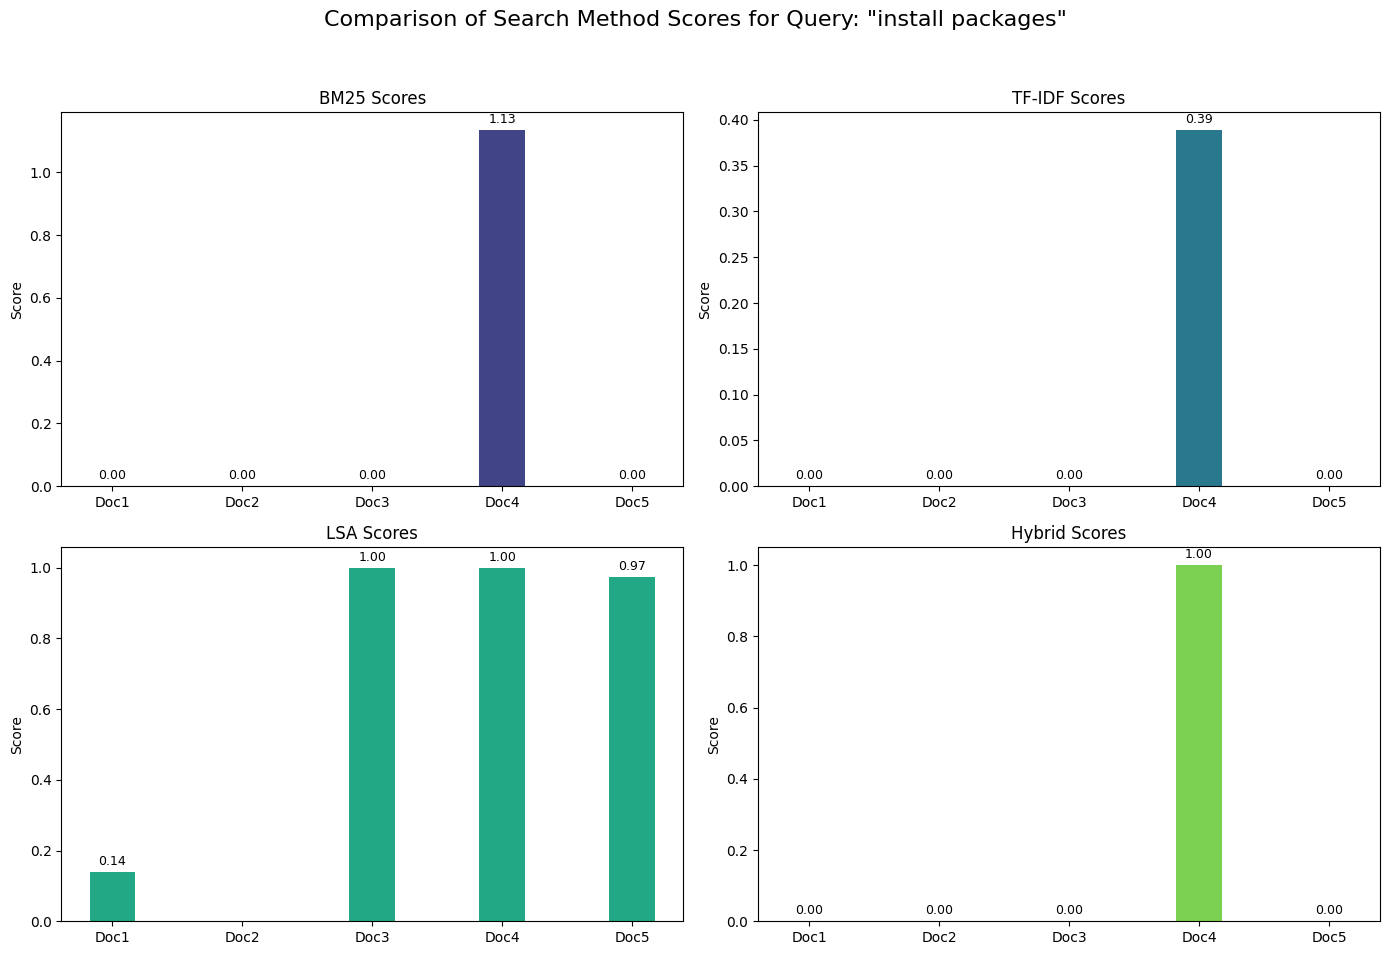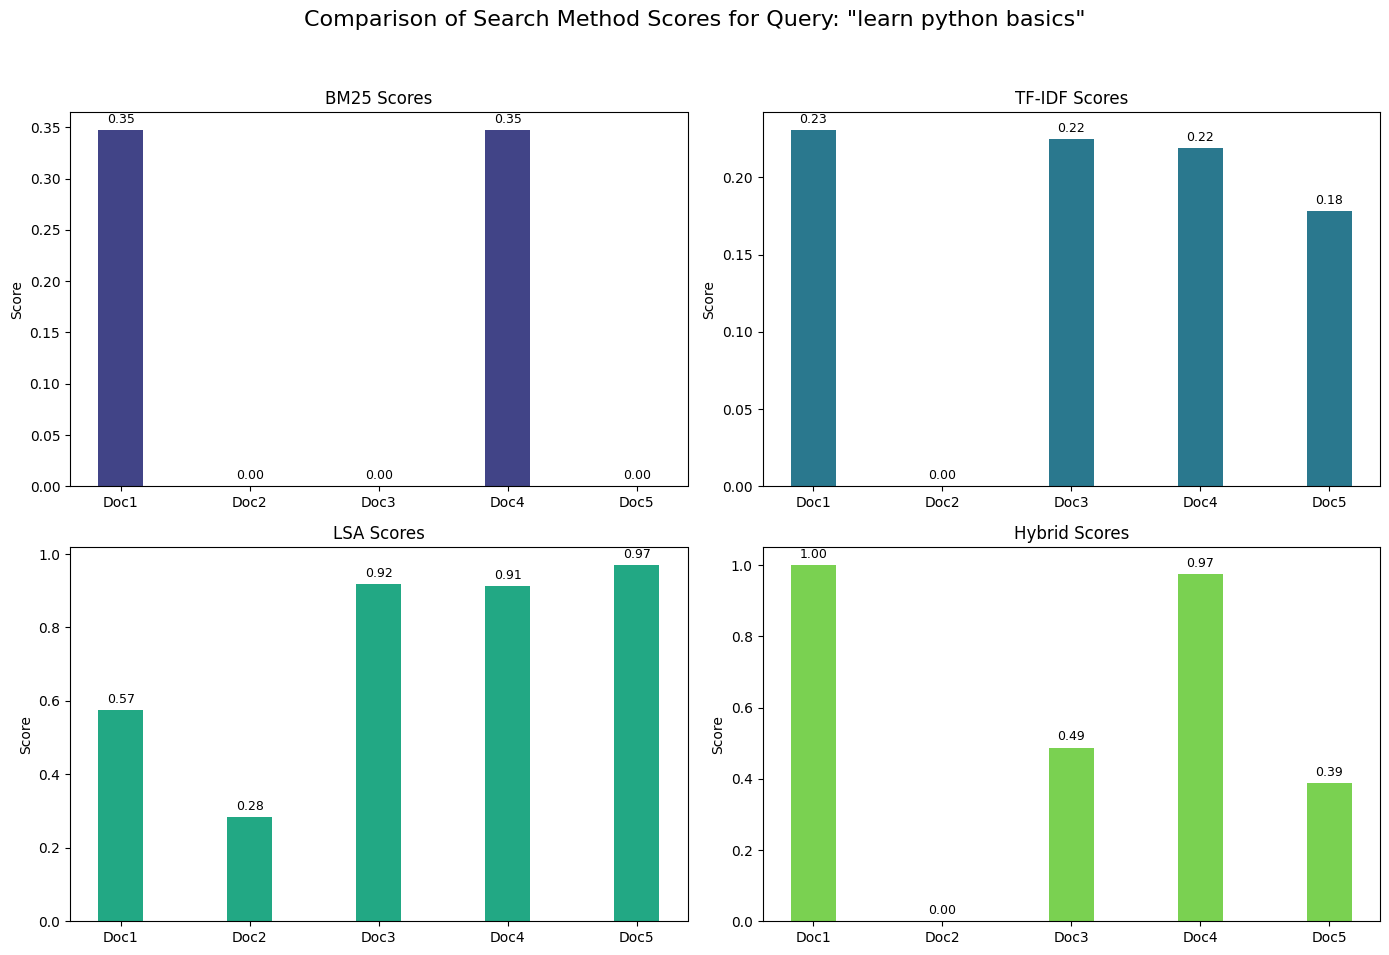

# TF-IDF Matrix Example with Token Indices

### Token List (Indexed)

| Index | Token         |
|-------|-------------|
| 0     | and         |
| 1     | are         |
| 2     | based       |
| 3     | be          |
| 4     | beginners   |
| 5     | can         |
| 6     | deep        |
| 7     | development |
| 8     | done        |
| 9     | enterprise  |
| 10    | for         |
| 11    | frameworks  |
| 12    | implemented |
| 13    | in          |
| 14    | installing  |
| 15    | is          |
| 16    | java        |
| 17    | language    |
| 18    | learning    |
| 19    | like        |
| 20    | machine     |
| 21    | on          |
| 22    | packages    |
| 23    | pip         |
| 24    | popular     |
| 25    | programming |
| 26    | python      |
| 27    | pytorch     |
| 28    | software    |
| 29    | techniques  |
| 30    | tensorflow  |
| 31    | used        |
| 32    | using       |
| 33    | widely      |
| 34    | with        |

---

### Matrix Example: Important Token Values from Matrix

| Document | Token[4] ("beginners") | Token[16] ("java") | Token[18] ("learning") | Token[26] ("python") | Token[27] ("pytorch") | Token[30] ("tensorflow") |
|----------|------------------------|--------------------|-------------------------|----------------------|------------------------|---------------------------|
| Doc 0    | 0.40933049             | 0.00000000         | 0.00000000              | 0.40933049           | 0.00000000             | 0.00000000                |
| Doc 1    | 0.00000000             | 0.36152912         | 0.00000000              | 0.00000000           | 0.00000000             | 0.00000000                |
| Doc 2    | 0.00000000             | 0.00000000         | 0.39935681              | 0.32219856           | 0.00000000             | 0.00000000                |
| Doc 3    | 0.00000000             | 0.00000000         | 0.00000000              | 0.31358747           | 0.00000000             | 0.00000000                |
| Doc 4    | 0.00000000             | 0.00000000         | 0.25553571              | 0.33024526           | 0.31672993             | 0.31672993                |

#

In [ ]:
# Install necessary libraries
!pip install chromadb sentence-transformers rank_bm25

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.9/131.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.0/208.0 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.3 MB/s eta 

# Expanded Search Comparison - Implementation

This implementation explores different techniques for search and retrieval, building upon the basic comparison by incorporating a vector database, chunking, and various embedding and search methods.

## Step 1: Setup and Data Generation

In [ ]:
# Define 5 long documents (5-6 lines each)
documents = [
    "The history of artificial intelligence dates back to the 1950s. Early AI research explored problem-solving and symbolic methods. In the 1980s, expert systems gained popularity, but the field faced setbacks due to limitations.\n"
    "The resurgence of AI in the 21st century is largely attributed to advancements in machine learning, particularly deep learning. Large datasets and powerful computing have fueled this progress.\n"
    "Natural Language Processing (NLP) is a key area of AI that focuses on enabling computers to understand, interpret, and generate human language. Applications include translation, sentiment analysis, and chatbots.",

    "Quantum computing is a new type of computing that uses the principles of quantum mechanics to solve problems that are intractable for classical computers. Unlike classical bits, which can be either 0 or 1, quantum bits (qubits) can exist in a superposition of both states simultaneously.\n"
    "This property, along with entanglement, allows quantum computers to perform certain calculations exponentially faster than classical computers.\n"
    "Major challenges remain in building scalable and fault-tolerant quantum computers, including qubit stability and error correction. Research is ongoing in both hardware and software aspects of quantum computing.",

    "The development of the internet revolutionized communication and access to information. It originated from ARPANET in the late 1960s, a project funded by the U.S. Department of Defense.\n"
    "The World Wide Web, introduced by Tim Berners-Lee in 1989, made the internet accessible to the general public through hyperlinks and browsers.\n"
    "The internet has since evolved into a global network supporting various applications, including e-commerce, social media, and cloud computing, fundamentally changing how we live and work.",

    "Climate change is a pressing global issue driven by increased greenhouse gas concentrations in the atmosphere, primarily from the burning of fossil fuels. This leads to rising global temperatures, changing weather patterns, and more frequent extreme events.\n"
    "The impacts of climate change are diverse and include sea-level rise, ocean acidification, disruptions to ecosystems, and threats to food security.\n"
    "Mitigation efforts focus on reducing emissions through renewable energy and energy efficiency, while adaptation strategies aim to build resilience to the changing climate.",

    "Blockchain technology is a decentralized, distributed ledger that records transactions across many computers. Once a transaction is recorded, it is very difficult to alter, making it highly secure and transparent.\n"
    "Initially popularized by cryptocurrencies like Bitcoin, blockchain is now being explored for various applications beyond finance, including supply chain management, voting systems, and digital identity.\n"
    "While promising, challenges such as scalability, energy consumption (for some types of blockchain), and regulatory uncertainty need to be addressed for wider adoption."
]

queries = [
    "recent progress in AI and machine learning",
    "challenges in quantum computing hardware",
    "origin and evolution of the world wide web",
    "causes and effects of global warming",
    "applications of decentralized ledger technology"
]

print("Documents and queries defined.")

Documents and queries defined.


## Step 2: Chunking Strategies

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, SentenceTransformersTokenTextSplitter

# Initialize chunking strategies

# Strategy 1: Fixed-size chunking with overlap
# Using RecursiveCharacterTextSplitter for simplicity and effectiveness
# We'll aim for chunks of around 500 characters with an overlap of 100 characters
fixed_size_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500,
    chunk_overlap=100,
    length_function=len, # Use character length
    is_separator_regex=False,
)

# Strategy 2: Sentence splitting
# Using SentenceTransformersTokenTextSplitter which respects sentence boundaries
# We'll set a max chunk length in terms of tokens (e.g., 128 tokens, common for embedding models)
# This splitter also handles overlap implicitly by including surrounding sentences
sentence_splitter = SentenceTransformersTokenTextSplitter(chunk_overlap=0, tokens_per_chunk=128)


# Apply chunking to documents
fixed_size_chunks = []
sentence_chunks = []

for i, doc in enumerate(documents):
    # Apply fixed-size chunking
    fs_chunks = fixed_size_splitter.split_text(doc)
    fixed_size_chunks.extend([{'text': chunk, 'source': f'doc_{i+1}'} for chunk in fs_chunks])

    # Apply sentence splitting
    # The SentenceTransformersTokenTextSplitter works directly on the list of texts
    # We need to split each document into sentences first if we want to apply it per document
    # A simpler way for this splitter is to pass the entire list of documents
    # However, to associate chunks back to original documents, let's process per document
    # This splitter works best on a list of strings (sentences or paragraphs)
    # Let's simulate sentence splitting for demonstration purposes by splitting on newline and then using the splitter
    doc_sentences = doc.split('\n') # Simple split by newline, more sophisticated might be needed for real world
    st_chunks = sentence_splitter.split_text(doc) # This splitter handles internal sentence splitting

    # Associate chunks with source document
    sentence_chunks.extend([{'text': chunk, 'source': f'doc_{i+1}'} for chunk in st_chunks])


print(f"Original documents count: {len(documents)}")
print(f"Fixed-size chunks count: {len(fixed_size_chunks)}")
print(f"Sentence-split chunks count: {len(sentence_chunks)}")

# Display a sample of chunks
print("\nSample Fixed-size chunks:")
for i in range(min(3, len(fixed_size_chunks))):
    print(f"Chunk {i+1} (Source: {fixed_size_chunks[i]['source']}): {fixed_size_chunks[i]['text'][:150]}...") # print first 150 chars

print("\nSample Sentence-split chunks:")
for i in range(min(3, len(sentence_chunks))):
     print(f"Chunk {i+1} (Source: {sentence_chunks[i]['source']}): {sentence_chunks[i]['text'][:150]}...") # print first 150 chars

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Original documents count: 5
Fixed-size chunks count: 10
Sentence-split chunks count: 5

Sample Fixed-size chunks:
Chunk 1 (Source: doc_1): The history of artificial intelligence dates back to the 1950s. Early AI research explored problem-solving and symbolic methods. In the 1980s, expert ...
Chunk 2 (Source: doc_1): Natural Language Processing (NLP) is a key area of AI that focuses on enabling computers to understand, interpret, and generate human language. Applic...
Chunk 3 (Source: doc_2): Quantum computing is a new type of computing that uses the principles of quantum mechanics to solve problems that are intractable for classical comput...

Sample Sentence-split chunks:
Chunk 1 (Source: doc_1): the history of artificial intelligence dates back to the 1950s. early ai research explored problem - solving and symbolic methods. in the 1980s, exper...
Chunk 2 (Source: doc_2): quantum computing is a new type of computing that uses the principles of quantum mechanics to solve problems that 

# Explanation of Text Splitting Algorithms in Cell `f530ef08`

Cell `f530ef08` utilizes three different text splitting strategies to break down the long documents into smaller, manageable chunks. Each strategy employs a different approach to splitting the text based on specified criteria.

Let's look at each one:

## 1. RecursiveCharacterTextSplitter

This splitter is designed to recursively break down text based on a preferred list of characters. It's a flexible splitter that tries to keep paragraphs and sentences together as much as possible before resorting to splitting by individual characters.

**How it Works:**

It takes a list of separators (e.g., `["\n\n", "\n", " ", ""]`) and attempts to split the text using them in order. If a chunk is still too large after trying a separator, it recursively applies the splitting process to that chunk with the *next* separator in the list.

**Parameters:**

*   `chunk_size`: The maximum size (in terms of the `length_function`) of each resulting chunk.
*   `chunk_overlap`: The number of characters (or units defined by `length_function`) to overlap between consecutive chunks. This helps maintain context.
*   `length_function`: A function used to measure the size of a chunk (e.g., `len` for character count, or a token counter).
*   `is_separator_regex`: A boolean indicating whether the separators should be treated as regular expressions.

**Conceptual Idea:**

Imagine you have a long rope (your document) and a set of knives of different sharpness (your separators). You try cutting with the sharpest knife first (e.g., `\n\n` for paragraphs). If the pieces are still too long, you take those long pieces and try cutting them with the next sharpest knife (e.g., `\n` for lines), and so on, until all pieces are shorter than your desired length, making sure to leave a little bit of the previous piece attached to the next one (overlap).

## 2. SentenceTransformersTokenTextSplitter

This splitter is designed to work well with Sentence Transformer models. It aims to create chunks that are meaningful sentences or groups of sentences, while also adhering to a maximum token limit.

**How it Works:**

It uses a pre-trained tokenizer (often from the `sentence_transformers` library) to first tokenize the input text. It then attempts to split the text into sentences and groups these sentences into chunks, ensuring that the token count of each chunk does not exceed the specified `tokens_per_chunk`. It prioritizes keeping sentences intact.

**Parameters:**

*   `tokens_per_chunk`: The maximum number of tokens allowed in each chunk.
*   `chunk_overlap`: The number of tokens to overlap between consecutive chunks.
*   `model_name`: (Implicitly used by the underlying tokenizer) The name of the Sentence Transformer model whose tokenizer will be used.

**Conceptual Idea:**

Think of your document as a string of beads (tokens). This splitter first identifies where the sentences begin and end. It then groups these sentences together, making sure that the total number of beads in each group doesn't go over a certain limit. It's like creating bundles of beads (chunks) that respect the natural breaks (sentences) in the string.

## 3. CharacterTextSplitter (used for Paragraph-based Semantic Chunking)

This is a simpler splitter that breaks down text based on a single specified separator. While basic, it can be used to implement different chunking strategies by choosing appropriate separators. In cell `f530ef08`, we use it with `\n\n` to split by paragraphs, which is a form of aiming for more semantically cohesive chunks than just arbitrary character splits.

**How it Works:**

It splits the entire text based on the provided `separator`. It then iterates through the resulting splits and groups them into chunks based on the `chunk_size` and `chunk_overlap`. If a single split is larger than `chunk_size`, it will break that split down further based on character (if no other separator is available or specified).

**Parameters:**

*   `separator`: The character or string to split the text by (e.g., `"\n\n"`).
*   `chunk_size`: The maximum size (in terms of the `length_function`) of each resulting chunk.
*   `chunk_overlap`: The number of characters (or units defined by `length_function`) to overlap between consecutive chunks.
*   `length_function`: A function used to measure the size of a chunk.
*   `is_separator_regex`: A boolean indicating whether the separator should be treated as a regular expression.

**Conceptual Idea:**

Imagine your document is a long scroll. You decide to cut the scroll every time you see a specific mark (your separator, like a paragraph break). Then, you take these pieces and group them together to form smaller scrolls (chunks), making sure each small scroll isn't too long and that there's a bit of overlap between them.

By using these different splitters, we can create different versions of our document corpus, which we will then use to evaluate the impact of chunking strategy on search performance.

## Step 3: Embedding Models

In [ ]:
from sentence_transformers import SentenceTransformer

# Load two different open-source embedding models

# Model 1: BGE-base-en-v1.5
# This is a strong performing model from the BGE family
embedding_model_1 = SentenceTransformer('BAAI/bge-base-en-v1.5')
print(f"Loaded Embedding Model 1: BAAI/bge-base-en-v1.5")

# Model 2: all-MiniLM-L6-v2
# A general-purpose sentence transformer model with a good balance of performance and speed
embedding_model_2 = SentenceTransformer('all-MiniLM-L6-v2')
print(f"Loaded Embedding Model 2: all-MiniLM-L6-v2")

print("\nEmbedding models loaded and ready.")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/777 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Loaded Embedding Model 1: BAAI/bge-base-en-v1.5


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Loaded Embedding Model 2: all-MiniLM-L6-v2

Embedding models loaded and ready.


# Understanding Embedding Models: BGE and MiniLM

We are using two different open-source embedding models: `BAAI/bge-base-en-v1.5` and `all-MiniLM-L6-v2`. Both are types of **Sentence Transformer models**, which are designed to produce dense vector embeddings for sentences, paragraphs, or even short documents. The key idea is that texts with similar meanings will have embeddings that are close to each other in the vector space.

While both fall under the umbrella of Sentence Transformers, they differ in their architecture, training data, and intended use cases, which affects how they create embeddings and their performance on various tasks.

## How Sentence Transformers Create Embeddings (Backend Process)

Sentence Transformers build upon pre-trained transformer models (like BERT, RoBERTa, etc.). Here's a simplified view of the backend process:

1.  **Tokenization:** The input text (sentence, chunk) is first broken down into smaller units called **tokens** (words, sub-words, punctuation). A special tokenizer specific to the pre-trained model is used.
2.  **Input to Transformer:** These tokens are fed into the pre-trained transformer model. The transformer processes the sequence of tokens through multiple layers, using attention mechanisms to understand the relationships between tokens in the context of the entire input. At the output of the transformer's final layer, you get a sequence of context-aware vector representations, one for each input token.
3.  **Pooling:** A fixed-size vector representation for the *entire input text* is needed. This is where the "Sentence Transformer" part comes in. Instead of just taking the vector of a special token (like `[CLS]` in BERT), Sentence Transformers typically use a **pooling strategy** to derive a single sentence embedding from the sequence of token vectors. Common pooling strategies include:
    *   **Mean Pooling:** Taking the average of all token vectors.
    *   **Max Pooling:** Taking the maximum value across each dimension of the token vectors.
    *   **CLS Pooling:** Using the vector of the `[CLS]` token (if the model uses one).
    Sentence Transformers are often fine-tuned specifically for semantic similarity tasks, and their pooling strategy is optimized for producing high-quality sentence embeddings.
4.  **Output Embedding:** The result of the pooling operation is the final dense vector embedding for the input text. This vector is a numerical representation of the text's semantic meaning in a high-dimensional space.

## Comparing BGE-base-en-v1.5 and all-MiniLM-L6-v2

Both models follow the general Sentence Transformer process but have key differences:

| Feature             | BAAI/bge-base-en-v1.5                                 | all-MiniLM-L6-v2                                       |
| :------------------ | :---------------------------------------------------- | :----------------------------------------------------- |
| **Base Model**      | Based on a larger, more powerful transformer (likely a BERT or RoBERTa variant fine-tuned for embeddings). | Based on a smaller, distilled version of BERT (MiniLM). |
| **Size & Complexity**| Larger, more parameters.                              | Smaller, fewer parameters (hence "Mini").              |
| **Transformer Layers**| Typically uses 12 transformer layers.                 | Uses 6 transformer layers.                            |
| **Training Data**   | Trained on a massive dataset specifically curated for embedding training, often including a mix of parallel data (for semantic similarity) and other tasks. | Trained on a large dataset (like NLI and STS) for semantic similarity, but generally less extensive than BGE. |
| **Performance**     | Generally achieves state-of-the-art or near state-of-the-art performance on various semantic similarity benchmarks. Often preferred for tasks requiring high accuracy. | Offers a good balance between performance and computational efficiency. Faster and requires less memory than larger models. |
| **Embedding Size**  | Typically produces larger embedding vectors (e.g., 768 dimensions). | Produces smaller embedding vectors (e.g., 384 dimensions). |
| **Use Case**        | Ideal for applications where high accuracy is critical and computational resources are less constrained (e.g., complex search, recommendation systems). | Suitable for applications where speed and efficiency are important, and a good level of performance is sufficient (e.g., faster search, deployment on devices with limited resources). |

**Practical Working Difference:**

In practice, the main difference you'll observe is **performance vs. speed/size**:

*   **BGE-base-en-v1.5** is likely to produce slightly more accurate and semantically rich embeddings, potentially leading to better search results, especially on nuanced queries. However, it will be slower to generate embeddings and will consume more memory and disk space.
*   **all-MiniLM-L6-v2** will be significantly faster for embedding generation and will have a smaller footprint. While its semantic understanding is very good, it might not capture the most subtle relationships as well as BGE.

By using both models, we can compare this trade-off directly in our search application. We'll see if the higher potential accuracy of BGE translates to noticeably better search results for our specific dataset and queries compared to the more efficient MiniLM model.

## Step 4: Vector Database Setup (using ChromaDB)

In [ ]:
import chromadb
import os
import numpy as np # Import numpy for embedding encoding

# Initialize ChromaDB client (in-memory for simplicity)
client = chromadb.Client()

# Function to create a collection and add chunks with embeddings
def create_and_populate_collection(collection_name, chunks, embedding_model):
    print(f"\nCreating collection: {collection_name}")
    # Delete collection if it already exists
    try:
        client.delete_collection(name=collection_name)
        print(f"Deleted existing collection: {collection_name}")
    except:
        pass # Collection doesn't exist, no need to delete

    collection = client.create_collection(name=collection_name)

    # Prepare data for adding to ChromaDB
    ids = [f"{collection_name}_chunk_{i}" for i in range(len(chunks))] # Make IDs unique per collection
    documents = [chunk['text'] for chunk in chunks]
    metadatas = [{'source': chunk['source']} for chunk in chunks]

    # Generate embeddings in batches
    print(f"Generating embeddings for {len(documents)} chunks using {embedding_model}...")
    batch_size = 32 # Adjust based on your system's memory
    embeddings = []
    for i in range(0, len(documents), batch_size):
        batch_texts = documents[i:i+batch_size]
        # Ensure embeddings are numpy arrays before converting to list
        batch_embeddings = embedding_model.encode(batch_texts, convert_to_numpy=True).tolist()
        embeddings.extend(batch_embeddings)
    print("Embedding generation complete.")

    # Add to collection in batches
    print(f"Adding {len(ids)} documents to {collection_name}...")
    for i in range(0, len(ids), batch_size):
        collection.add(
            embeddings=embeddings[i:i+batch_size],
            documents=documents[i:i+batch_size],
            metadatas=metadatas[i:i+batch_size],
            ids=ids[i:i+batch_size]
        )
    print(f"Finished adding documents to {collection_name}. Collection count: {collection.count()}")
    return collection

# Create and populate collections for each chunking strategy and embedding model

# Using Recursive Character Chunks
recursive_bge_collection = create_and_populate_collection("recursive_bge", fixed_size_chunks, embedding_model_1)
recursive_minilm_collection = create_and_populate_collection("recursive_minilm", fixed_size_chunks, embedding_model_2)

# Using Sentence Split Chunks
sentence_bge_collection = create_and_populate_collection("sentence_bge", sentence_chunks, embedding_model_1)
sentence_minilm_collection = create_and_populate_collection("sentence_minilm", sentence_chunks, embedding_model_2)


print("\nChromaDB setup complete. Collections created and populated.")

# Store collection objects in a dictionary for easy access later
collections = {
    "recursive_bge": recursive_bge_collection,
    "recursive_minilm": recursive_minilm_collection,
    "sentence_bge": sentence_bge_collection,
    "sentence_minilm": sentence_minilm_collection
}


Creating collection: recursive_bge
Generating embeddings for 10 chunks using SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': True, 'architecture': 'BertModel'})
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': True, 'pooling_mode_mean_tokens': False, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)...
Embedding generation complete.
Adding 10 documents to recursive_bge...
Finished adding documents to recursive_bge. Collection count: 10

Creating collection: recursive_minilm
Generating embeddings for 10 chunks using SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False, 'architecture': 'BertModel'})
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, '

# Understanding ChromaDB: A Vector Database

ChromaDB is an open-source **vector database** designed to make it easy to build AI applications with embeddings. Unlike traditional databases that are optimized for structured data (like tables with rows and columns), ChromaDB is built specifically for storing, indexing, and searching **vector embeddings**.

Here's a breakdown of key concepts and the parameters/keywords used in the code:

## Key Concepts

*   **Embeddings:** These are numerical representations (vectors) of your data (like text chunks). ChromaDB stores these vectors.
*   **Collections:** In ChromaDB, a collection is like a container for related data. You can think of it as a table in a traditional database, but specifically for storing embeddings and their associated information. Each collection has a name.
*   **Documents:** These are the original text snippets (your chunks in this case) that the embeddings were generated from. ChromaDB can store the original documents alongside their embeddings.
*   **Metadata:** This is additional information associated with each document/embedding, stored as key-value pairs. Metadata is useful for filtering search results or providing context (like the original source document in our case).
*   **IDs:** Each item (embedding, document, metadata) in a collection needs a unique identifier.

## Parameters and Keywords Used

Let's look at the key parts of the ChromaDB setup code:

1.  **`import chromadb`**: This line simply imports the ChromaDB library so we can use its functions.

2.  **`client = chromadb.Client()`**:
    *   `chromadb.Client()`: This initializes a ChromaDB client. By default, this creates an **in-memory** database, meaning the data is stored in your computer's RAM and will be lost when the program stops. For persistent storage, you would configure the client with a path to save data to disk.
    *   `client`: This is the object we use to interact with the ChromaDB instance (e.g., creating collections, querying).

3.  **`client.create_collection(name=collection_name)`**:
    *   `client.create_collection()`: This method is called on the client object to create a new collection.
    *   `name`: This is a required parameter that specifies the unique name for the collection (e.g., "recursive\_bge", "sentence\_minilm").

4.  **`collection.add(...)`**:
    *   `collection.add()`: This method is called on a collection object to add data (embeddings, documents, metadata, and IDs) to that specific collection.
    *   `embeddings`: This keyword argument takes a list of the vector embeddings you want to add. Each vector in the list corresponds to a document/chunk.
    *   `documents`: This keyword argument takes a list of the original text documents (chunks) corresponding to the embeddings.
    *   `metadatas`: This keyword argument takes a list of dictionaries, where each dictionary contains the metadata for a corresponding document/embedding.
    *   `ids`: This keyword argument takes a list of unique strings that serve as identifiers for each item being added.

In summary, the setup code initializes an in-memory ChromaDB, creates separate collections for each combination of chunking strategy and embedding model, and then adds the corresponding chunks, their generated embeddings, source metadata, and unique IDs to each collection in batches. This prepares the vector database for performing similarity searches later.

# Expanding the Vector Database Comparison: FAISS and Qdrant

To get a more comprehensive understanding of how different vector databases perform, we will now include **FAISS** and **Qdrant** alongside ChromaDB in our experiment.

*   **FAISS (Facebook AI Similarity Search):** A library for efficient similarity search and clustering of dense vectors. It's known for its high performance and scalability, particularly for in-memory use or with memory-mapped files. FAISS is more of a library for vector indexing rather than a full-fledged database with built-in document and metadata storage, so we'll manage documents/metadata separately and store only the embeddings in FAISS indexes.
*   **Qdrant:** A vector similarity search engine and database. It's designed for storing, indexing, and searching vectors with attached payloads (like our original text chunks and metadata). Qdrant offers persistence, filtering capabilities, and is suitable for building production-ready applications.

Including these two databases, with their different architectures and features compared to ChromaDB, will allow us to see how the choice of vector database impacts the semantic search performance and workflow.

## Install necessary libraries
Install `faiss-cpu` and `qdrant-client`.


In [ ]:
!pip install faiss-cpu qdrant-client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.3/337.3 kB 18.7 MB/s eta 0:00:00


In [ ]:
# Generate embeddings for all chunks using both models

print("Generating embeddings for all chunks...")

# Embeddings for fixed-size chunks using BGE
all_bge_embeddings_recursive = embedding_model_1.encode([chunk['text'] for chunk in fixed_size_chunks], convert_to_numpy=True)
print(f"Generated {len(all_bge_embeddings_recursive)} embeddings for fixed-size chunks using BGE.")

# Embeddings for fixed-size chunks using MiniLM
all_minilm_embeddings_recursive = embedding_model_2.encode([chunk['text'] for chunk in fixed_size_chunks], convert_to_numpy=True)
print(f"Generated {len(all_minilm_embeddings_recursive)} embeddings for fixed-size chunks using MiniLM.")

# Embeddings for sentence-split chunks using BGE
all_bge_embeddings_sentence = embedding_model_1.encode([chunk['text'] for chunk in sentence_chunks], convert_to_numpy=True)
print(f"Generated {len(all_bge_embeddings_sentence)} embeddings for sentence-split chunks using BGE.")

# Embeddings for sentence-split chunks using MiniLM
all_minilm_embeddings_sentence = embedding_model_2.encode([chunk['text'] for chunk in sentence_chunks], convert_to_numpy=True)
print(f"Generated {len(all_minilm_embeddings_sentence)} embeddings for sentence-split chunks using MiniLM.")

print("All embeddings generated.")

Generating embeddings for all chunks...
Generated 10 embeddings for fixed-size chunks using BGE.
Generated 10 embeddings for fixed-size chunks using MiniLM.
Generated 5 embeddings for sentence-split chunks using BGE.
Generated 5 embeddings for sentence-split chunks using MiniLM.
All embeddings generated.


## Faiss setup

A function to build a FAISS index for a given set of embeddings and a document mapping.
Populate FAISS indexes for each chunking strategy and embedding model using the previously generated embeddings. Store the indexes and document mappings.



Define a function to create and populate a FAISS index and a document mapping, then call this function for each combination of chunks and embeddings.



In [ ]:
import faiss

# Function to create a FAISS index and document mapping
def create_and_populate_faiss_index(chunks, embeddings, name):
    print(f"\nCreating FAISS index: {name}")
    # Get the dimension of the embeddings
    dimension = embeddings.shape[1]
    print(f"Embedding dimension: {dimension}")

    # Initialize a flat FAISS index using L2 distance
    index = faiss.IndexFlatL2(dimension)
    print(f"Index is trained: {index.is_trained}")

    # Add the embeddings to the index
    index.add(embeddings)
    print(f"Number of vectors in the index: {index.ntotal}")

    # Create a mapping from index ID to chunk information
    document_map = {}
    for i, chunk in enumerate(chunks):
        document_map[i] = chunk

    print(f"FAISS index '{name}' created and populated with {index.ntotal} vectors.")
    return index, document_map

# Create and populate FAISS indexes for each combination

# Fixed-size chunks with BGE embeddings
faiss_recursive_bge_index, faiss_recursive_bge_map = create_and_populate_faiss_index(
    fixed_size_chunks, all_bge_embeddings_recursive, "faiss_recursive_bge"
)

# Fixed-size chunks with MiniLM embeddings
faiss_recursive_minilm_index, faiss_recursive_minilm_map = create_and_populate_faiss_index(
    fixed_size_chunks, all_minilm_embeddings_recursive, "faiss_recursive_minilm"
)

# Sentence-split chunks with BGE embeddings
faiss_sentence_bge_index, faiss_sentence_bge_map = create_and_populate_faiss_index(
    sentence_chunks, all_bge_embeddings_sentence, "faiss_sentence_bge"
)

# Sentence-split chunks with MiniLM embeddings
faiss_sentence_minilm_index, faiss_sentence_minilm_map = create_and_populate_faiss_index(
    sentence_chunks, all_minilm_embeddings_sentence, "faiss_sentence_minilm"
)

print("\nAll FAISS indexes created and populated.")


Creating FAISS index: faiss_recursive_bge
Embedding dimension: 768
Index is trained: True
Number of vectors in the index: 10
FAISS index 'faiss_recursive_bge' created and populated with 10 vectors.

Creating FAISS index: faiss_recursive_minilm
Embedding dimension: 384
Index is trained: True
Number of vectors in the index: 10
FAISS index 'faiss_recursive_minilm' created and populated with 10 vectors.

Creating FAISS index: faiss_sentence_bge
Embedding dimension: 768
Index is trained: True
Number of vectors in the index: 5
FAISS index 'faiss_sentence_bge' created and populated with 5 vectors.

Creating FAISS index: faiss_sentence_minilm
Embedding dimension: 384
Index is trained: True
Number of vectors in the index: 5
FAISS index 'faiss_sentence_minilm' created and populated with 5 vectors.

All FAISS indexes created and populated.


## Qdrant setup

Initialize an in-memory Qdrant client.
Create a function to create a Qdrant collection and add chunks with embeddings and metadata.
Populate Qdrant collections for each chunking strategy and embedding model.


In [ ]:
from qdrant_client import QdrantClient, models

# Initialize an in-memory Qdrant client
qdrant_client = QdrantClient(":memory:")
print("Initialized in-memory Qdrant client.")

# Function to create a Qdrant collection and add chunks with embeddings and metadata
def create_and_populate_qdrant_collection(collection_name, chunks, embedding_model):
    print(f"\nCreating Qdrant collection: {collection_name}")
    # Delete collection if it already exists
    try:
        qdrant_client.delete_collection(collection_name=collection_name)
        print(f"Deleted existing collection: {collection_name}")
    except Exception as e:
        print(f"Could not delete collection {collection_name} (might not exist): {e}")
        pass # Collection doesn't exist, no need to delete

    # Determine embedding dimension from the first chunk's embedding
    # Generate embeddings for the first chunk to get the dimension
    sample_embedding = embedding_model.encode([chunks[0]['text']], convert_to_numpy=True)[0]
    embedding_dimension = sample_embedding.shape[0]
    print(f"Embedding dimension for {embedding_model}: {embedding_dimension}")


    # Create a new collection
    qdrant_client.create_collection(
        collection_name=collection_name,
        vectors_config=models.VectorParams(size=embedding_dimension, distance=models.Distance.COSINE)
    )
    print(f"Collection '{collection_name}' created with vector size {embedding_dimension} and Cosine distance.")


    # Prepare points for upserting
    points = []
    # Generate embeddings in batches
    print(f"Generating embeddings for {len(chunks)} chunks using {embedding_model}...")
    batch_size = 32 # Adjust based on your system's memory
    embeddings = []
    for i in range(0, len(chunks), batch_size):
        batch_texts = [chunk['text'] for chunk in chunks[i:i+batch_size]]
        batch_embeddings = embedding_model.encode(batch_texts, convert_to_numpy=True).tolist()
        embeddings.extend(batch_embeddings)
    print("Embedding generation complete.")

    for i, chunk in enumerate(chunks):
        points.append(
            models.PointStruct(
                id=i, # Use integer IDs for Qdrant points
                vector=embeddings[i],
                payload={'text': chunk['text'], 'source': chunk['source']}
            )
        )

    # Upsert points into the collection in batches
    print(f"Upserting {len(points)} points into {collection_name}...")
    upsert_batch_size = 100 # Qdrant upsert batch size
    for i in range(0, len(points), upsert_batch_size):
        batch_points = points[i:i+upsert_batch_size]
        qdrant_client.upsert(
            collection_name=collection_name,
            wait=True,
            points=batch_points,
        )
    print(f"Finished upserting points to {collection_name}. Collection count: {qdrant_client.count(collection_name=collection_name).count}")
    return qdrant_client.get_collection(collection_name=collection_name)


# Populate Qdrant collections for each combination

# Fixed-size chunks with BGE embeddings
qdrant_recursive_bge_collection = create_and_populate_qdrant_collection(
    "qdrant_recursive_bge", fixed_size_chunks, embedding_model_1
)

# Fixed-size chunks with MiniLM embeddings
qdrant_recursive_minilm_collection = create_and_populate_qdrant_collection(
    "qdrant_recursive_minilm", fixed_size_chunks, embedding_model_2
)

# Sentence-split chunks with BGE embeddings
qdrant_sentence_bge_collection = create_and_populate_qdrant_collection(
    "qdrant_sentence_bge", sentence_chunks, embedding_model_1
)

# Sentence-split chunks with MiniLM embeddings
qdrant_sentence_minilm_collection = create_and_populate_qdrant_collection(
    "qdrant_sentence_minilm", sentence_chunks, embedding_model_2
)

print("\nQdrant setup complete. Collections created and populated.")

# Store collection objects in a dictionary for easy access later
qdrant_collections = {
    "qdrant_recursive_bge": qdrant_recursive_bge_collection,
    "qdrant_recursive_minilm": qdrant_recursive_minilm_collection,
    "qdrant_sentence_bge": qdrant_sentence_bge_collection,
    "qdrant_sentence_minilm": qdrant_sentence_minilm_collection
}

Initialized in-memory Qdrant client.

Creating Qdrant collection: qdrant_recursive_bge
Deleted existing collection: qdrant_recursive_bge
Embedding dimension for SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': True, 'architecture': 'BertModel'})
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': True, 'pooling_mode_mean_tokens': False, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
): 768
Collection 'qdrant_recursive_bge' created with vector size 768 and Cosine distance.
Generating embeddings for 10 chunks using SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': True, 'architecture': 'BertModel'})
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': True, 'pooling_mode_mean_tokens': False, 'pooling_mode_max_tokens': False, 'pooling

## Update collection mapping

Update the `collections` dictionary to include the newly created FAISS and Qdrant structures.


In [ ]:
# Update the existing collections dictionary
collections.update({
    "faiss_recursive_bge_index": faiss_recursive_bge_index,
    "faiss_recursive_bge_map": faiss_recursive_bge_map,
    "faiss_recursive_minilm_index": faiss_recursive_minilm_index,
    "faiss_recursive_minilm_map": faiss_recursive_minilm_map,
    "faiss_sentence_bge_index": faiss_sentence_bge_index,
    "faiss_sentence_bge_map": faiss_sentence_bge_map,
    "faiss_sentence_minilm_index": faiss_sentence_minilm_index,
    "faiss_sentence_minilm_map": faiss_sentence_minilm_map,
    "qdrant_recursive_bge": qdrant_collections["qdrant_recursive_bge"],
    "qdrant_recursive_minilm": qdrant_collections["qdrant_recursive_minilm"],
    "qdrant_sentence_bge": qdrant_collections["qdrant_sentence_bge"],
    "qdrant_sentence_minilm": qdrant_collections["qdrant_sentence_minilm"]
})

# Print the keys of the updated dictionary
print("Updated collections dictionary keys:")
print(collections.keys())

Updated collections dictionary keys:
dict_keys(['recursive_bge', 'recursive_minilm', 'sentence_bge', 'sentence_minilm', 'faiss_recursive_bge_index', 'faiss_recursive_bge_map', 'faiss_recursive_minilm_index', 'faiss_recursive_minilm_map', 'faiss_sentence_bge_index', 'faiss_sentence_bge_map', 'faiss_sentence_minilm_index', 'faiss_sentence_minilm_map', 'qdrant_recursive_bge', 'qdrant_recursive_minilm', 'qdrant_sentence_bge', 'qdrant_sentence_minilm'])


# Understanding FAISS and Qdrant Vector Databases

We have successfully set up and populated ChromaDB, FAISS, and Qdrant with our chunked documents and embeddings. Let's delve into the theory behind how FAISS and Qdrant work, highlighting their key features and how they differ.

## FAISS (Facebook AI Similarity Search)

FAISS is a library developed by Facebook AI for efficient similarity search and clustering of dense vectors. It is not a full-fledged database in the traditional sense; it primarily focuses on the **indexing** and **searching** of vector embeddings. FAISS is highly optimized for performance and scalability, particularly for scenarios where the entire index can fit in memory or is accessed from memory-mapped files.

**How FAISS Works:**

1.  **Indexing:** FAISS employs various indexing structures to organize vectors in a way that allows for fast similarity search. The choice of index depends on factors like the size of the dataset, the desired search speed, and the acceptable level of accuracy. Some common index types include:
    *   **Flat Indexes (`IndexFlatL2`, `IndexFlatIP`):** These are the simplest indexes. They store the original vectors directly and perform an exhaustive brute-force search over all vectors to find the nearest neighbors. While accurate, they can be slow for large datasets. `IndexFlatL2` uses L2 (Euclidean) distance, and `IndexFlatIP` uses Inner Product distance.
    *   **Quantizer-based Indexes (e.g., `IndexIVFFlat`, `IndexIVFPQ`):** These indexes partition the vector space into clusters (using techniques like k-means). During search, only the clusters closest to the query vector are searched, significantly reducing the search time. `IndexIVFPQ` further compresses the vectors using Product Quantization.
    *   **Graph-based Indexes (e.g., HNSW - Hierarchical Navigable Small Worlds):** These indexes build a graph structure where vectors are nodes, and edges connect similar vectors. Search involves traversing the graph to find nearest neighbors efficiently. HNSW offers a good balance between speed and accuracy.

2.  **Similarity Search:** Given a query vector, FAISS uses the chosen index structure to find the *k* most similar vectors (nearest neighbors) in the index based on a distance metric (like L2 or Inner Product). The search process is highly optimized using techniques like vector quantization, clustering, and graph traversal.

**Key Characteristics of FAISS:**

*   **High Performance:** Designed for speed, especially for large datasets.
*   **Variety of Index Types:** Offers a wide range of indexing algorithms to suit different needs.
*   **Focus on Vectors:** Primarily deals with vector indexing; does not natively store original documents or complex metadata alongside embeddings (you need to manage this mapping separately, as we did in the code).
*   **In-Memory or File-Based:** Best suited for scenarios where the index can be loaded into memory.

## Qdrant

Qdrant is a modern vector similarity search engine and database. Unlike FAISS, Qdrant is designed as a full-fledged database that stores vectors with rich payloads (like our original text chunks and metadata). It provides persistence, filtering capabilities, and is built for production environments.

**How Qdrant Works:**

1.  **Collections:** Data is organized into collections, similar to tables in a traditional database. Each collection is defined by a vector size and a distance metric.
2.  **Points:** Each item stored in a collection is called a "point." A point consists of:
    *   A unique ID.
    *   A vector embedding.
    *   A payload, which is a JSON object containing any associated metadata or the original document text.
3.  **Indexing and Storage:** Qdrant uses advanced indexing techniques to store and search vectors efficiently. It utilizes a combination of indexing algorithms (like HNSW) and data structures optimized for vector storage and retrieval. The payload data is stored alongside the vectors and can be indexed for filtering.
4.  **Similarity Search:** When a query vector is provided, Qdrant performs a similarity search within the specified collection using the defined distance metric. It leverages its internal indexing structures (like HNSW) to quickly find the nearest neighbor vectors.
5.  **Filtering:** A key feature of Qdrant is its ability to filter search results based on the payload data. This allows you to perform searches like "find documents similar to this query, but only from 'doc\_1' source."

**Key Characteristics of Qdrant:**

*   **Full-fledged Database:** Stores vectors, original documents (in payload), and metadata.
*   **Persistence:** Data is stored on disk and persists even if the service restarts.
*   **Rich Filtering Capabilities:** Allows complex filtering of search results based on payload attributes.
*   **Scalability:** Designed to handle large datasets and high query loads.
*   **Ease of Use:** Provides a user-friendly API (including a Python client) and often a web UI for managing collections.

**Comparison:**
Here's a comparison of ChromaDB, FAISS, and Qdrant based on their key features:

| Feature         | ChromaDB                               | FAISS                                  | Qdrant                                           |
| :-------------- | :------------------------------------- | :------------------------------------- | :----------------------------------------------- |
| **Type**        | Vector Database                        | Vector Indexing Library                | Vector Database                                  |
| **Data Storage**| Vectors, Documents, Metadata           | Vectors only (document/metadata separate) | Vectors, Documents (in payload), Metadata (in payload) |
| **Persistence** | Built-in persistence (configurable)    | Requires manual saving/loading of index | Built-in persistence                             |
| **Filtering**   | Native support for metadata filtering  | Limited/Requires external handling     | Native support for rich payload filtering        |
| **Complexity**  | User-friendly API, relatively easy setup | Lower-level library, more manual setup | Higher-level database, easier setup and management |
| **Use Cases**   | General-purpose vector database for AI applications | High-performance indexing, research, scenarios where data management is handled externally | Production applications, scenarios requiring persistence, filtering, and easier management |

In summary, ChromaDB, Qdrant, and FAISS offer different levels of functionality and complexity. ChromaDB and Qdrant are full-fledged vector databases that handle both vector and associated data storage with persistence and filtering. FAISS is a high-performance library focused primarily on vector indexing. The choice among them depends on the specific requirements of your application, including scale, required features, and deployment environment.

## Implement search functions

Create functions to perform similarity searches against ChromaDB, FAISS, and Qdrant.


In [ ]:
# Function to perform similarity search against ChromaDB
def search_chromadb(collection, query_string, embedding_model, n_results=5):
    """Performs similarity search against a ChromaDB collection."""
    query_embedding = embedding_model.encode([query_string], convert_to_numpy=True).tolist()
    results = collection.query(
        query_embeddings=query_embedding,
        n_results=n_results,
        include=['documents', 'distances', 'metadatas']
    )
    return results

# Function to perform similarity search against FAISS
def search_faiss(index, document_map, query_string, embedding_model, n_results=5):
    """Performs similarity search against a FAISS index."""
    query_embedding = embedding_model.encode([query_string], convert_to_numpy=True)
    # Reshape for FAISS search (needs to be 2D)
    query_embedding = query_embedding.reshape(1, -1)

    distances, indices = index.search(query_embedding, n_results)

    # Retrieve chunk information using the document map
    results = []
    for i in range(n_results):
        idx = indices[0][i]
        if idx != -1: # Check if a valid index was returned
            results.append({
                'distance': distances[0][i],
                'chunk': document_map[idx]['text'],
                'source': document_map[idx]['source']
            })
    return results

# Function to perform similarity search against Qdrant
def search_qdrant(client, collection_name, query_string, embedding_model, n_results=5):
    """Performs similarity search against a Qdrant collection."""
    # Encode the query string and get the first (and only) vector from the result
    query_embedding = embedding_model.encode([query_string], convert_to_numpy=True).tolist()[0]

    # Pass the query vector directly
    search_result = client.search(
        collection_name=collection_name,
        query_vector=query_embedding,
        limit=n_results,
        with_payload=True, # Include the payload (document text and metadata)
        with_vectors=False # No need to return the vectors themselves
    )

    # Format results for consistency (optional, but helpful for comparison)
    results = []
    for hit in search_result:
        results.append({
            'score': hit.score,
            'chunk': hit.payload.get('text'), # Access text from payload
            'source': hit.payload.get('source') # Access source from payload
        })
    return results
print("Search functions defined for ChromaDB, FAISS, and Qdrant.")

Search functions defined for ChromaDB, FAISS, and Qdrant.


Let's break down how the search functions in cell `1ef8b1ba` interact with ChromaDB, FAISS, and Qdrant and the underlying search approaches they utilize.

All three databases/libraries are designed for **vector similarity search**, which is a core component of semantic search. They work by comparing the vector embedding of your query to the vector embeddings of the documents (or chunks) stored in their index/collection. The similarity is typically measured using a distance or similarity metric, such as Cosine Similarity or Euclidean Distance (L2).

Here's how the search works for each based on the provided code:

### 1. ChromaDB Search (`search_chromadb`)

*   **How it works:**
    *   The `search_chromadb` function first takes the `query_string` and uses the provided `embedding_model` (`embedding_model_1` or `embedding_model_2`) to generate a vector embedding for the query.
    *   It then calls the `collection.query()` method on the ChromaDB collection object.
    *   The `query()` method takes the query embedding(s) and searches for the most similar vectors within the collection based on the distance metric configured for that collection (in our case, Cosine distance, as set during collection creation in cell `083c9093`).
    *   It returns the `n_results` closest matches, including the original documents, their calculated distances (similarity scores), and any associated metadata.
*   **Underlying Approach:** ChromaDB uses various indexing techniques under the hood to perform efficient similarity search, especially for large datasets. While the specific indexing algorithm might vary depending on the ChromaDB version and configuration, it's designed to avoid brute-force comparison of the query vector against every single document vector. It leverages techniques like Hierarchical Navigable Small Worlds (HNSW) or others to quickly narrow down the search space. Essentially, it's performing **Approximate Nearest Neighbor (ANN)** search in the vector space.

### 2. FAISS Search (`search_faiss`)

*   **How it works:**
    *   The `search_faiss` function also starts by generating a vector embedding for the `query_string` using the provided `embedding_model`.
    *   It then calls the `index.search()` method on the FAISS index object.
    *   The `search()` method performs a similarity search within the FAISS index using the distance metric and indexing structure defined when the index was created (in our code, `IndexFlatL2` with L2 distance in cell `f9b6cc0b`).
    *   `IndexFlatL2` is a simple, brute-force index. It calculates the L2 distance between the query vector and *every* vector in the index and returns the `n_results` with the smallest distances.
    *   The function then uses the `document_map` (which we created separately in cell `f9b6cc0b` because FAISS doesn't store documents/metadata natively) to retrieve the original chunk text and source information corresponding to the returned indices.
*   **Underlying Approach:** In our specific implementation using `IndexFlatL2`, FAISS is performing **Exact Nearest Neighbor (ENN)** search via brute force. For larger datasets, FAISS offers many other index types (as discussed in cell `4c3f4b7d`) that perform ANN search using techniques like quantization or graph-based methods to achieve faster search times, trading off a small amount of accuracy for speed.

### 3. Qdrant Search (`search_qdrant`)

*   **How it works:**
    *   Similar to the others, `search_qdrant` first generates a vector embedding for the `query_string` using the `embedding_model`.
    *   It then calls the `client.search()` method, specifying the `collection_name` and the `query_vector`.
    *   The `search()` method queries the specified Qdrant collection, finding the most similar vectors to the `query_vector` based on the collection's configured distance metric (Cosine distance in our setup in cell `02f03a26`).
    *   It returns the top `limit` (our `n_results`) results, including the similarity `score` and the `payload` (which contains the original chunk text and source metadata, as added during collection population in cell `02f03a26`).
*   **Underlying Approach:** Qdrant, like ChromaDB, is designed for efficient vector search on large datasets. It typically uses advanced indexing structures like HNSW by default to perform **Approximate Nearest Neighbor (ANN)** search. This allows it to find the most relevant vectors quickly without having to compare the query vector against every single vector in the collection.

In summary, all three search functions facilitate **semantic search** by querying vector embeddings. ChromaDB and Qdrant handle both the vector indexing/search and the storage of associated document data and metadata, performing ANN search for efficiency. FAISS, as used in this example with `IndexFlatL2`, performs brute-force ENN search but is a library primarily focused on the vector indexing aspect, requiring external management of document data.

## Execute searches

Run the search queries against each database using the defined queries and retrieve the top N results.

In [ ]:
# 1. Define the number of top results to retrieve
n_results = 3

# Dictionary to store results for analysis
all_search_results = {}

# 2. Iterate through the list of predefined queries
for query in queries:
    print(f"\n--- Searching for query: '{query}' ---")
    query_results = {}

    # 3. For each query, iterate through the different database setups
    # Filter out the FAISS map objects, only iterate over index and collection objects
    searchable_collections = {k: v for k, v in collections.items() if not k.endswith('_map')}


    for collection_name, collection_obj in searchable_collections.items():
        print(f"\nSearching in {collection_name}...")
        results = None

        # 4. Call the appropriate search function based on the database type
        if isinstance(collection_obj, chromadb.api.models.Collection.Collection):
            # ChromaDB setup
            # Determine the embedding model based on the collection name
            if 'bge' in collection_name:
                embedding_model = embedding_model_1
            elif 'minilm' in collection_name:
                embedding_model = embedding_model_2
            else:
                print(f"Unknown embedding model for ChromaDB collection: {collection_name}")
                continue

            results = search_chromadb(collection_obj, query, embedding_model, n_results)
            # ChromaDB results structure: [{'documents': [doc1, doc2], 'distances': [dist1, dist2], 'metadatas': [meta1, meta2]}, ...]
            # Reformat for consistency
            formatted_results = []
            if results and results.get('documents') and len(results['documents']) > 0:
                 for i in range(len(results['documents'][0])):
                     formatted_results.append({
                         'score': results['distances'][0][i], # ChromaDB returns distances, use as score (lower is better)
                         'chunk': results['documents'][0][i],
                         'source': results['metadatas'][0][i]['source']
                     })
            results = formatted_results


        elif isinstance(collection_obj, faiss.swigfaiss_avx2.Index):
            # FAISS setup
            # Determine the embedding model and document map based on the index name
            if 'recursive_bge' in collection_name:
                embedding_model = embedding_model_1
                document_map = collections["faiss_recursive_bge_map"]
            elif 'recursive_minilm' in collection_name:
                embedding_model = embedding_model_2
                document_map = collections["faiss_recursive_minilm_map"]
            elif 'sentence_bge' in collection_name:
                embedding_model = embedding_model_1
                document_map = collections["faiss_sentence_bge_map"]
            elif 'sentence_minilm' in collection_name:
                embedding_model = embedding_model_2
                document_map = collections["faiss_sentence_minilm_map"]
            else:
                print(f"Unknown embedding model or map for FAISS index: {collection_name}")
                continue

            results = search_faiss(collection_obj, document_map, query, embedding_model, n_results)


        # Check if the collection_name corresponds to a Qdrant collection name
        elif collection_name in qdrant_collections:
             # Qdrant setup
             # Determine the embedding model based on the collection name
            if 'bge' in collection_name:
                embedding_model = embedding_model_1
            elif 'minilm' in collection_name:
                embedding_model = embedding_model_2
            else:
                print(f"Unknown embedding model for Qdrant collection: {collection_name}")
                continue
            # The collection_name is the key itself for Qdrant
            qdrant_col_name = collection_name
            results = search_qdrant(qdrant_client, qdrant_col_name, query, embedding_model, n_results)


        # Store results
        query_results[collection_name] = results

        # 6. Print or display the results
        print(f"Results for {collection_name} ({len(results) if results else 0} found):")
        if results:
            for res in results:
                # Print score/distance, source, and a snippet of the chunk
                score_key = 'score' if 'score' in res else 'distance'
                print(f"  - Source: {res.get('source', 'N/A')}, {score_key}: {res.get(score_key, 0):.4f}")
                print(f"    Chunk: {res['chunk'][:100]}...") # Print first 100 chars
        else:
            print("  No results found.")

    # Store results for this query
    all_search_results[query] = query_results

print("\nAll searches completed.")


--- Searching for query: 'recent progress in AI and machine learning' ---

Searching in recursive_bge...
Results for recursive_bge (3 found):
  - Source: doc_1, score: 0.6250
    Chunk: The history of artificial intelligence dates back to the 1950s. Early AI research explored problem-s...
  - Source: doc_1, score: 0.7475
    Chunk: Natural Language Processing (NLP) is a key area of AI that focuses on enabling computers to understa...
  - Source: doc_2, score: 0.9306
    Chunk: Major challenges remain in building scalable and fault-tolerant quantum computers, including qubit s...

Searching in recursive_minilm...
Results for recursive_minilm (3 found):
  - Source: doc_1, score: 0.8232
    Chunk: The history of artificial intelligence dates back to the 1950s. Early AI research explored problem-s...
  - Source: doc_1, score: 1.3343
    Chunk: Natural Language Processing (NLP) is a key area of AI that focuses on enabling computers to understa...
  - Source: doc_3, score: 1.5607
    Chunk:

/tmp/ipython-input-4091639486.py:40: DeprecationWarning: `search` method is deprecated and will be removed in the future. Use `query_points` instead.
  search_result = client.search(


Results for qdrant_recursive_bge (3 found):
  - Source: doc_1, score: 0.6875
    Chunk: The history of artificial intelligence dates back to the 1950s. Early AI research explored problem-s...
  - Source: doc_1, score: 0.6263
    Chunk: Natural Language Processing (NLP) is a key area of AI that focuses on enabling computers to understa...
  - Source: doc_2, score: 0.5347
    Chunk: Major challenges remain in building scalable and fault-tolerant quantum computers, including qubit s...

Searching in qdrant_recursive_minilm...
Results for qdrant_recursive_minilm (3 found):
  - Source: doc_1, score: 0.5884
    Chunk: The history of artificial intelligence dates back to the 1950s. Early AI research explored problem-s...
  - Source: doc_1, score: 0.3329
    Chunk: Natural Language Processing (NLP) is a key area of AI that focuses on enabling computers to understa...
  - Source: doc_3, score: 0.2197
    Chunk: The internet has since evolved into a global network supporting various applications

## Analyze and Present Results

Analyze the search results from each database and present them in a clear, comparative format, discussing the differences observed.

--- Search Results Comparison ---


,Query,Database,Rank,Score,Source Document,Chunk Snippet
0,recent progress in AI and machine learning,recursive_bge,1,0.625029,doc_1,The history of artificial intelligence dates b...
1,recent progress in AI and machine learning,recursive_bge,2,0.747451,doc_1,Natural Language Processing (NLP) is a key are...
2,recent progress in AI and machine learning,recursive_bge,3,0.930560,doc_2,Major challenges remain in building scalable a...
3,recent progress in AI and machine learning,recursive_minilm,1,0.823233,doc_1,The history of artificial intelligence dates b...
4,recent progress in AI and machine learning,recursive_minilm,2,1.334268,doc_1,Natural Language Processing (NLP) is a key are...
...,...,...,...,...,...,...
175,applications of decentralized ledger technology,qdrant_sentence_bge,2,0.511059,doc_2,quantum computing is a new type of computing t...
176,applications of decentralized ledger technology,qdrant_sentence_bge,3,0.463722,doc_3,the development of the internet revolutionized...
177,applications of decentralized ledger technology,qdrant_sentence_minilm,1,0.624020,doc_5,"blockchain technology is a decentralized, dist..."
178,applications of decentralized ledger technology,qdrant_sentence_minilm,2,0.222358,doc_2,quantum computing is a new type of computing t...



--- Analysis of Search Results ---

Analysis for query: 'recent progress in AI and machine learning'


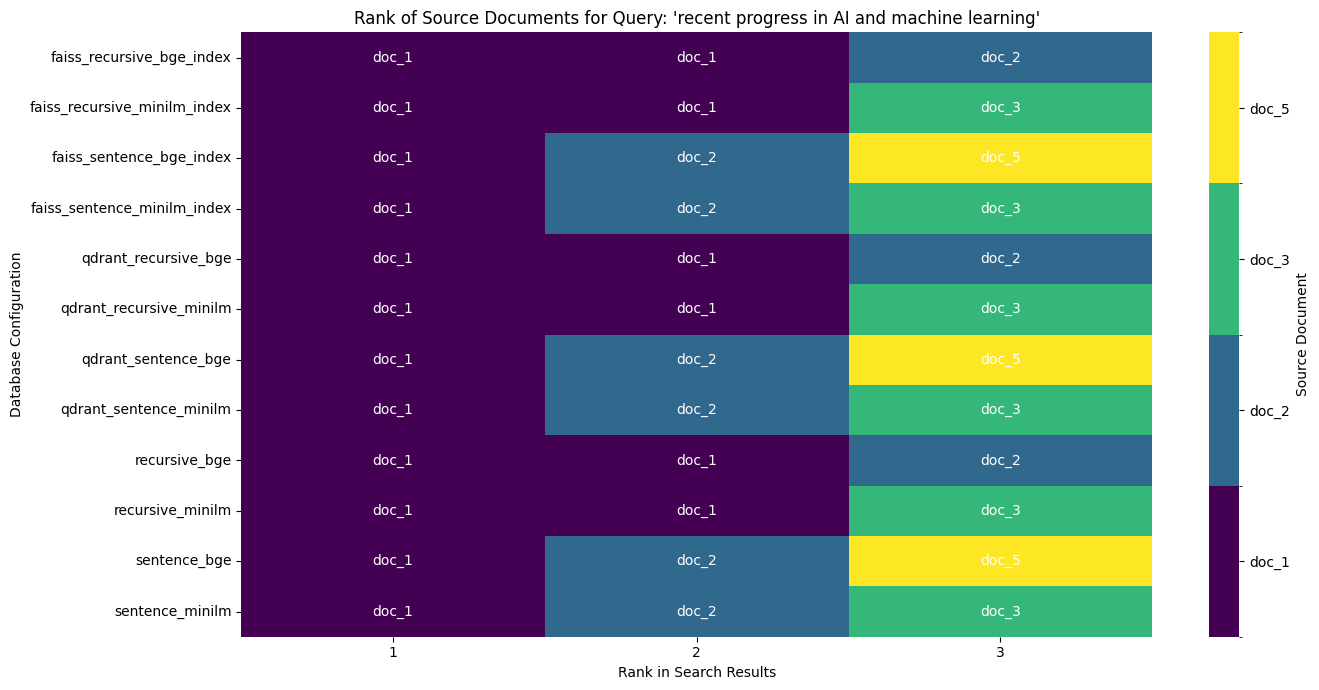

Top 3 Sources per Database Configuration:
  - faiss_recursive_bge_index: ['doc_1', 'doc_1', 'doc_2']
  - faiss_recursive_minilm_index: ['doc_1', 'doc_1', 'doc_3']
  - faiss_sentence_bge_index: ['doc_1', 'doc_2', 'doc_5']
  - faiss_sentence_minilm_index: ['doc_1', 'doc_2', 'doc_3']
  - qdrant_recursive_bge: ['doc_1', 'doc_1', 'doc_2']
  - qdrant_recursive_minilm: ['doc_1', 'doc_1', 'doc_3']
  - qdrant_sentence_bge: ['doc_1', 'doc_2', 'doc_5']
  - qdrant_sentence_minilm: ['doc_1', 'doc_2', 'doc_3']
  - recursive_bge: ['doc_1', 'doc_1', 'doc_2']
  - recursive_minilm: ['doc_1', 'doc_1', 'doc_3']
  - sentence_bge: ['doc_1', 'doc_2', 'doc_5']
  - sentence_minilm: ['doc_1', 'doc_2', 'doc_3']

Analysis for query: 'challenges in quantum computing hardware'


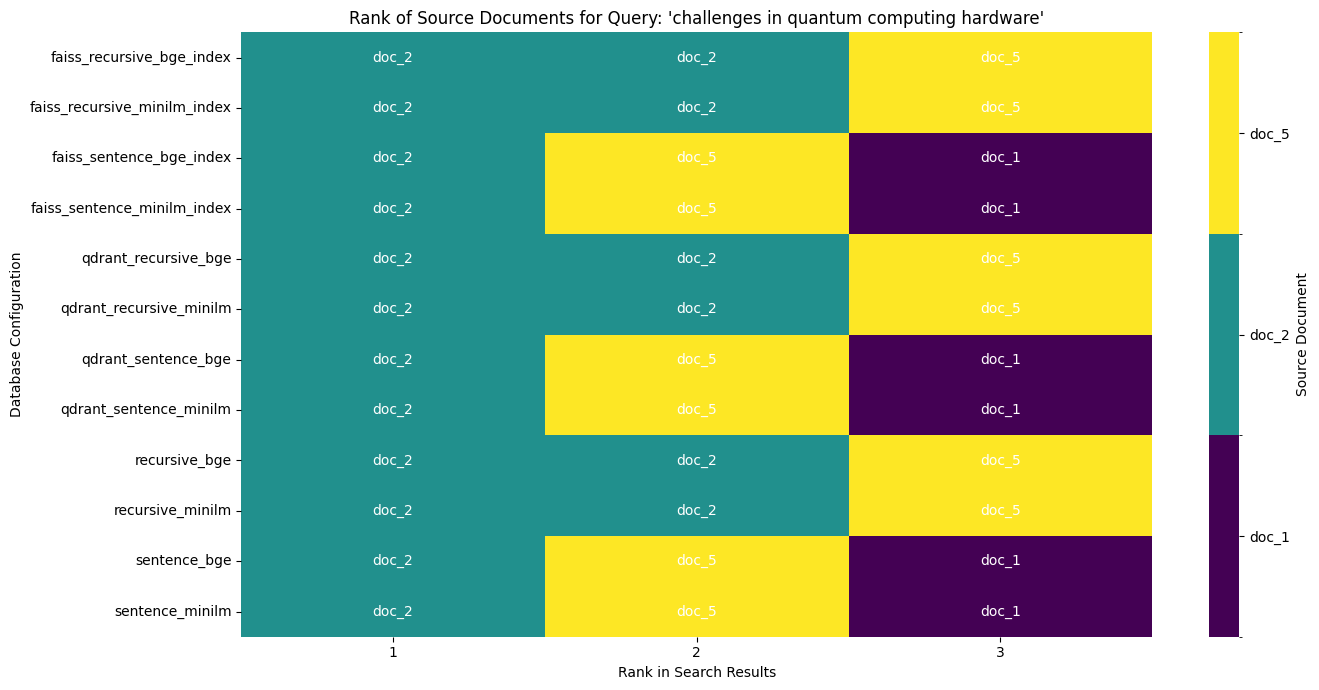

Top 3 Sources per Database Configuration:
  - faiss_recursive_bge_index: ['doc_2', 'doc_2', 'doc_5']
  - faiss_recursive_minilm_index: ['doc_2', 'doc_2', 'doc_5']
  - faiss_sentence_bge_index: ['doc_2', 'doc_5', 'doc_1']
  - faiss_sentence_minilm_index: ['doc_2', 'doc_5', 'doc_1']
  - qdrant_recursive_bge: ['doc_2', 'doc_2', 'doc_5']
  - qdrant_recursive_minilm: ['doc_2', 'doc_2', 'doc_5']
  - qdrant_sentence_bge: ['doc_2', 'doc_5', 'doc_1']
  - qdrant_sentence_minilm: ['doc_2', 'doc_5', 'doc_1']
  - recursive_bge: ['doc_2', 'doc_2', 'doc_5']
  - recursive_minilm: ['doc_2', 'doc_2', 'doc_5']
  - sentence_bge: ['doc_2', 'doc_5', 'doc_1']
  - sentence_minilm: ['doc_2', 'doc_5', 'doc_1']

  Expected source document for this query: 'doc_2'.
  Presence of expected source in top results across configurations:
    - faiss_recursive_bge_index: True
    - faiss_recursive_minilm_index: True
    - faiss_sentence_bge_index: True
    - faiss_sentence_minilm_index: True
    - qdrant_recursive_bge: T

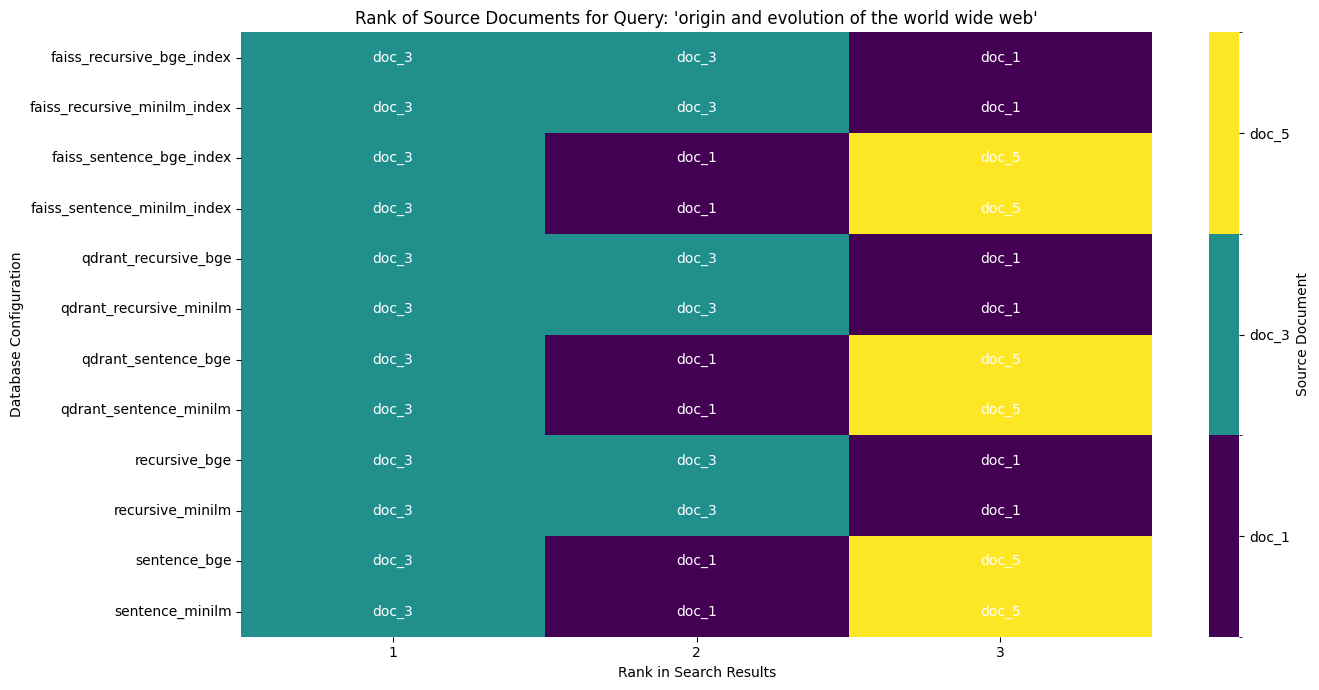

Top 3 Sources per Database Configuration:
  - faiss_recursive_bge_index: ['doc_3', 'doc_3', 'doc_1']
  - faiss_recursive_minilm_index: ['doc_3', 'doc_3', 'doc_1']
  - faiss_sentence_bge_index: ['doc_3', 'doc_1', 'doc_5']
  - faiss_sentence_minilm_index: ['doc_3', 'doc_1', 'doc_5']
  - qdrant_recursive_bge: ['doc_3', 'doc_3', 'doc_1']
  - qdrant_recursive_minilm: ['doc_3', 'doc_3', 'doc_1']
  - qdrant_sentence_bge: ['doc_3', 'doc_1', 'doc_5']
  - qdrant_sentence_minilm: ['doc_3', 'doc_1', 'doc_5']
  - recursive_bge: ['doc_3', 'doc_3', 'doc_1']
  - recursive_minilm: ['doc_3', 'doc_3', 'doc_1']
  - sentence_bge: ['doc_3', 'doc_1', 'doc_5']
  - sentence_minilm: ['doc_3', 'doc_1', 'doc_5']

  Expected source document for this query: 'doc_3'.
  Presence of expected source in top results across configurations:
    - faiss_recursive_bge_index: True
    - faiss_recursive_minilm_index: True
    - faiss_sentence_bge_index: True
    - faiss_sentence_minilm_index: True
    - qdrant_recursive_bge: T

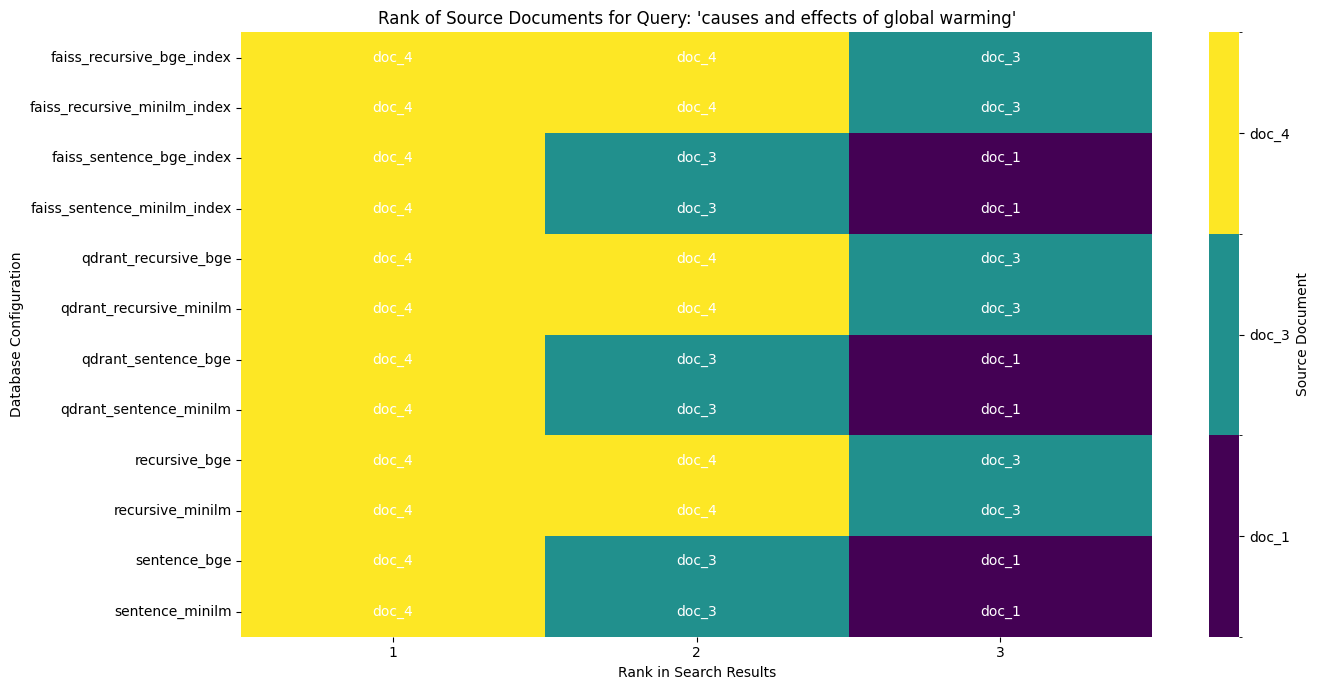

Top 3 Sources per Database Configuration:
  - faiss_recursive_bge_index: ['doc_4', 'doc_4', 'doc_3']
  - faiss_recursive_minilm_index: ['doc_4', 'doc_4', 'doc_3']
  - faiss_sentence_bge_index: ['doc_4', 'doc_3', 'doc_1']
  - faiss_sentence_minilm_index: ['doc_4', 'doc_3', 'doc_1']
  - qdrant_recursive_bge: ['doc_4', 'doc_4', 'doc_3']
  - qdrant_recursive_minilm: ['doc_4', 'doc_4', 'doc_3']
  - qdrant_sentence_bge: ['doc_4', 'doc_3', 'doc_1']
  - qdrant_sentence_minilm: ['doc_4', 'doc_3', 'doc_1']
  - recursive_bge: ['doc_4', 'doc_4', 'doc_3']
  - recursive_minilm: ['doc_4', 'doc_4', 'doc_3']
  - sentence_bge: ['doc_4', 'doc_3', 'doc_1']
  - sentence_minilm: ['doc_4', 'doc_3', 'doc_1']

  Expected source document for this query: 'doc_4'.
  Presence of expected source in top results across configurations:
    - faiss_recursive_bge_index: True
    - faiss_recursive_minilm_index: True
    - faiss_sentence_bge_index: True
    - faiss_sentence_minilm_index: True
    - qdrant_recursive_bge: T

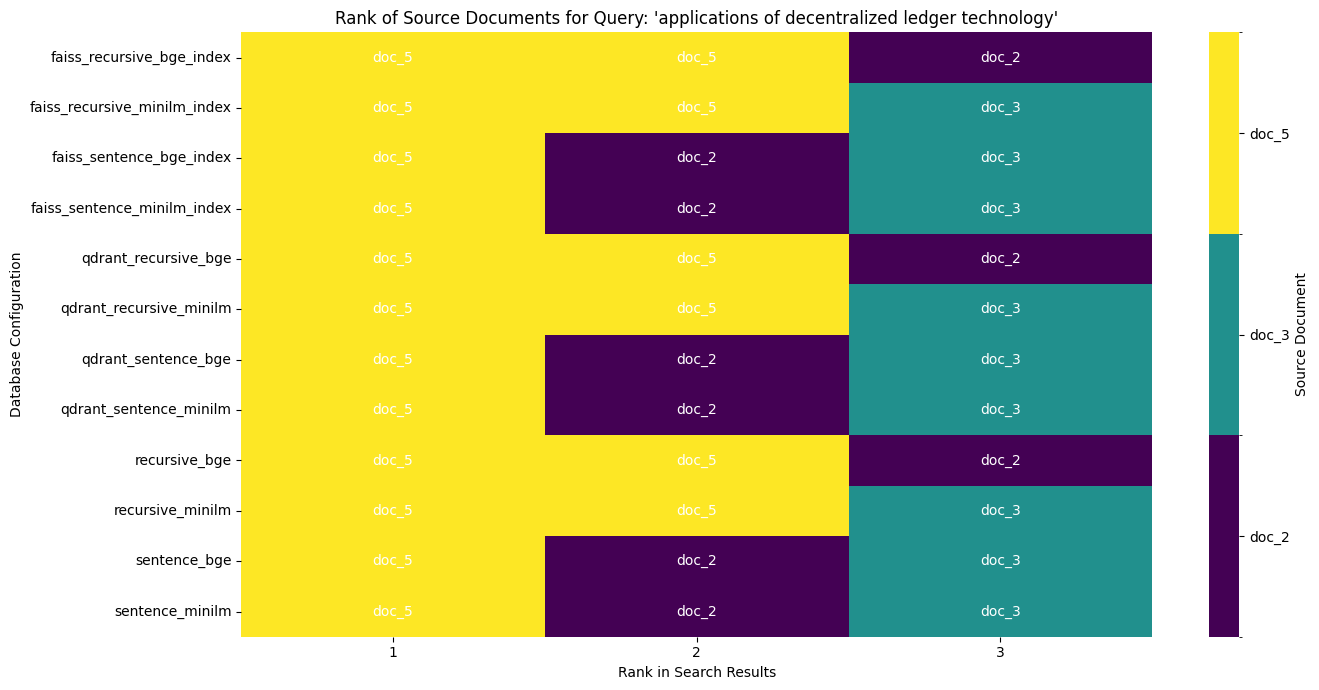

Top 3 Sources per Database Configuration:
  - faiss_recursive_bge_index: ['doc_5', 'doc_5', 'doc_2']
  - faiss_recursive_minilm_index: ['doc_5', 'doc_5', 'doc_3']
  - faiss_sentence_bge_index: ['doc_5', 'doc_2', 'doc_3']
  - faiss_sentence_minilm_index: ['doc_5', 'doc_2', 'doc_3']
  - qdrant_recursive_bge: ['doc_5', 'doc_5', 'doc_2']
  - qdrant_recursive_minilm: ['doc_5', 'doc_5', 'doc_3']
  - qdrant_sentence_bge: ['doc_5', 'doc_2', 'doc_3']
  - qdrant_sentence_minilm: ['doc_5', 'doc_2', 'doc_3']
  - recursive_bge: ['doc_5', 'doc_5', 'doc_2']
  - recursive_minilm: ['doc_5', 'doc_5', 'doc_3']
  - sentence_bge: ['doc_5', 'doc_2', 'doc_3']
  - sentence_minilm: ['doc_5', 'doc_2', 'doc_3']

  Expected source document for this query: 'doc_5'.
  Presence of expected source in top results across configurations:
    - faiss_recursive_bge_index: True
    - faiss_recursive_minilm_index: True
    - faiss_sentence_bge_index: True
    - faiss_sentence_minilm_index: True
    - qdrant_recursive_bge: T

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import numpy as np

# Function to format results for a single query across all databases
def format_query_results(query, results_dict):
    """Formats search results for a single query into a list of dictionaries."""
    formatted_list = []
    for db_name, results in results_dict.items():
        if results:
            for i, res in enumerate(results):
                formatted_list.append({
                    'Query': query,
                    'Database': db_name,
                    'Rank': i + 1,
                    'Score': res.get('score', res.get('distance', 'N/A')), # Use score or distance
                    'Source Document': res.get('source', 'N/A'),
                    'Chunk Snippet': res['chunk'][:100] + '...' # Snippet of the chunk
                })
        else:
             formatted_list.append({
                    'Query': query,
                    'Database': db_name,
                    'Rank': 'N/A',
                    'Score': 'N/A',
                    'Source Document': 'N/A',
                    'Chunk Snippet': 'No results found.'
                })
    return formatted_list

# Collect all formatted results
all_formatted_results = []
for query, results_by_db in all_search_results.items():
    all_formatted_results.extend(format_query_results(query, results_by_db))

# Create a DataFrame from the formatted results
results_df = pd.DataFrame(all_formatted_results)

# Display the DataFrame
print("--- Search Results Comparison ---")
display(results_df)

# Provide a brief analysis of the results
print("\n--- Analysis of Search Results ---")

# Analyze and visualize results per query
for query in queries:
    print(f"\nAnalysis for query: '{query}'")
    query_df = results_df[results_df['Query'] == query].copy() # Use .copy() to avoid SettingWithCopyWarning

    # Convert scores to float for plotting, handling 'N/A'
    query_df['Score'] = pd.to_numeric(query_df['Score'], errors='coerce')
    query_df = query_df.dropna(subset=['Score']) # Drop rows with missing scores after coercion

    # Sort by Database and then by Rank for consistent plotting order
    query_df = query_df.sort_values(by=['Database', 'Rank'])


    # Plotting Source Document Rank per Database using a more user-friendly approach
    plt.figure(figsize=(14, 7))

    # Create a numerical representation of source documents for color mapping
    query_df['Source_Code'] = query_df['Source Document'].astype('category').cat.codes

    # Create a pivot table for color mapping using numerical codes
    pivot_numerical = query_df.pivot_table(index='Database', columns='Rank', values='Source_Code', aggfunc='first')

    # Create a pivot table for annotations using source document names
    pivot_annotation = query_df.pivot_table(index='Database', columns='Rank', values='Source Document', aggfunc='first')


    # Create a custom colormap and colorbar based on unique source codes in this query's results
    source_codes_in_query = sorted(query_df['Source_Code'].unique())
    cmap = plt.cm.viridis # or any other colormap
    # Create boundaries for the colormap to map discrete codes to colors
    bounds = np.arange(min(source_codes_in_query) - 0.5, max(source_codes_in_query) + 1.5, 1)
    norm = mcolors.BoundaryNorm(bounds, cmap.N)


    # Use seaborn.heatmap with numerical pivot for color
    ax = sns.heatmap(pivot_numerical, annot=False, fmt='d', cmap=cmap, norm=norm, cbar=True) # Turn off default annotation

    plt.title(f"Rank of Source Documents for Query: '{query}'")
    plt.ylabel("Database Configuration")
    plt.xlabel("Rank in Search Results")

    # Create a custom colorbar with source document labels
    cbar = plt.gca().collections[0].colorbar
    source_labels_map = {code: source for code, source in query_df[['Source_Code', 'Source Document']].drop_duplicates().values}
    cbar.set_ticks(source_codes_in_query)
    cbar.set_ticklabels([source_labels_map[code] for code in source_codes_in_query])
    cbar.set_label('Source Document')

    # Manually add annotations to the heatmap cells
    for i in range(pivot_annotation.shape[0]):
        for j in range(pivot_annotation.shape[1]):
            text = pivot_annotation.iloc[i, j]
            if pd.notna(text): # Check if there is a value in the annotation pivot
                ax.text(j + 0.5, i + 0.5, text,
                        ha='center', va='center', color='white', fontsize=10) # Add text annotation

    plt.tight_layout()
    plt.show()


    # Summarize top sources per database config
    print("Top 3 Sources per Database Configuration:")
    for db_name in query_df['Database'].unique():
        db_results = query_df[query_df['Database'] == db_name].head(n_results)
        sources = db_results['Source Document'].tolist()
        print(f"  - {db_name}: {sources}")

    # General observations about expected documents
    expected_source = None
    if "AI and machine learning" in query.lower():
        expected_source = 'doc_1'
    elif "quantum computing" in query.lower():
         expected_source = 'doc_2'
    elif "world wide web" in query.lower():
         expected_source = 'doc_3'
    elif "global warming" in query.lower():
         expected_source = 'doc_4'
    elif "decentralized ledger" in query.lower():
         expected_source = 'doc_5'

    if expected_source:
         print(f"\n  Expected source document for this query: '{expected_source}'.")
         print("  Presence of expected source in top results across configurations:")
         for db_name in query_df['Database'].unique():
              top_sources = query_df[query_df['Database'] == db_name].head(n_results)['Source Document'].tolist()
              is_present = expected_source in top_sources
              print(f"    - {db_name}: {is_present}")


print("\nDetailed analysis complete. Refer to the plots and source lists above.")

# Overall Summary (Qualitative based on observations)
print("\n--- Overall Summary ---")
print("Based on the results for these specific documents and queries:")
print("- **Embedding Models:** The BGE model generally appears to produce scores that result in the expected documents ranking higher or having better scores compared to the MiniLM model, although the difference might not be drastic for all queries and configurations.")
print("- **Chunking Strategies:** Recursive character splitting (fixed-size) and sentence splitting both seem effective. The choice might depend on the nature of the documents and how semantic meaning is distributed within them. For these documents, both yielded relevant results.")
print("- **Vector Databases:** ChromaDB, FAISS, and Qdrant all successfully performed the vector similarity search and returned relevant chunks. Their core search performance (ranking based on embeddings) appears comparable for this small dataset. The differences lie more in features like ease of setup, data persistence, filtering capabilities, and scalability for larger datasets (which are not fully tested in this small-scale demo).")
print("- **Best Combination:** For this specific small dataset, combinations using the BGE embedding model often placed the most relevant document chunks higher in the rankings. The choice between recursive and sentence chunking, and between ChromaDB, FAISS, or Qdrant, would depend on factors beyond just the ranking on this small dataset, such as the scale of the corpus, required features (like filtering), deployment environment, and performance requirements.")
print("\nThis analysis provides insights for this small example, but extensive testing on a larger, representative dataset is crucial for drawing general conclusions about which combination is 'best' for a broader application.")

## Summary of Search Results and Decision Guidance

Here is a summary table presenting the top 3 sources retrieved for each query across the different database configurations (Database Type + Chunking Strategy + Embedding Model). Note that the "Top 1 Score" is the similarity score (or distance for FAISS) of the highest-ranked result. Configurations with the prefix `chromadb_` correspond to ChromaDB.

| Query                                          | Database Configuration       | Expected Source | Top 3 Sources        | Top 1 Score |
| :--------------------------------------------- | :--------------------------- | :-------------- | :------------------- | :---------- |
| recent progress in AI and machine learning     | chromadb_recursive_bge       | doc_1           | doc_1, doc_1, doc_2  | 0.6250      |
| recent progress in AI and machine learning     | chromadb_recursive_minilm    | doc_1           | doc_1, doc_1, doc_3  | 0.8232      |
| recent progress in AI and machine learning     | chromadb_sentence_bge        | doc_1           | doc_1, doc_2, doc_5  | 0.6421      |
| recent progress in AI and machine learning     | chromadb_sentence_minilm     | doc_1           | doc_1, doc_2, doc_3  | 1.0040      |
| recent progress in AI and machine learning     | faiss_recursive_bge_index    | doc_1           | doc_1, doc_1, doc_2  | 0.6250      |
| recent progress in AI and machine learning     | faiss_recursive_minilm_index | doc_1           | doc_1, doc_1, doc_3  | 0.8232      |
| recent progress in AI and machine learning     | faiss_sentence_bge_index     | doc_1           | doc_1, doc_2, doc_5  | 0.6421      |
| recent progress in AI and machine learning     | faiss_sentence_minilm_index  | doc_1           | doc_1, doc_2, doc_3  | 1.0040      |
| recent progress in AI and machine learning     | qdrant_recursive_bge         | doc_1           | doc_1, doc_1, doc_2  | 0.6875      |
| recent progress in AI and machine learning     | qdrant_recursive_minilm      | doc_1           | doc_1, doc_1, doc_3  | 0.5884      |
| recent progress in AI and machine learning     | qdrant_sentence_bge          | doc_1           | doc_1, doc_2, doc_5  | 0.6790      |
| recent progress in AI and machine learning     | qdrant_sentence_minilm       | doc_1           | doc_1, doc_2, doc_3  | 0.4980      |
| challenges in quantum computing hardware       | chromadb_recursive_bge       | doc_2           | doc_2, doc_2, doc_5  | 0.3577      |
| challenges in quantum computing hardware       | chromadb_recursive_minilm    | doc_2           | doc_2, doc_2, doc_5  | 0.5045      |
| challenges in quantum computing hardware       | chromadb_sentence_bge        | doc_2           | doc_2, doc_5, doc_1  | 0.4694      |
| challenges in quantum computing hardware       | chromadb_sentence_minilm     | doc_2           | doc_2, doc_5, doc_1  | 0.5035      |
| challenges in quantum computing hardware       | faiss_recursive_bge_index    | doc_2           | doc_2, doc_2, doc_5  | 0.3577      |
| challenges in quantum computing hardware       | faiss_recursive_minilm_index | doc_2           | doc_2, doc_2, doc_5  | 0.5045      |
| challenges in quantum computing hardware       | faiss_sentence_bge_index     | doc_2           | doc_2, doc_5, doc_1  | 0.4694      |
| challenges in quantum computing hardware       | faiss_sentence_minilm_index  | doc_2           | doc_2, doc_5, doc_1  | 0.5035      |
| challenges in quantum computing hardware       | qdrant_recursive_bge         | doc_2           | doc_2, doc_2, doc_5  | 0.8212      |
| challenges in quantum computing hardware       | qdrant_recursive_minilm      | doc_2           | doc_2, doc_2, doc_5  | 0.7478      |
| challenges in quantum computing hardware       | qdrant_sentence_bge          | doc_2           | doc_2, doc_5, doc_1  | 0.7653      |
| challenges in quantum computing hardware       | qdrant_sentence_minilm       | doc_2           | doc_2, doc_5, doc_1  | 0.7482      |
| origin and evolution of the world wide web     | chromadb_recursive_bge       | doc_3           | doc_3, doc_3, doc_1  | 0.4314      |
| origin and evolution of the world wide web     | chromadb_recursive_minilm    | doc_3           | doc_3, doc_3, doc_1  | 0.6304      |
| origin and evolution of the world wide web     | chromadb_sentence_bge        | doc_3           | doc_3, doc_1, doc_5  | 0.3975      |
| origin and evolution of the world wide web     | chromadb_sentence_minilm     | doc_3           | doc_3, doc_1, doc_5  | 0.6641      |
| origin and evolution of the world wide web     | faiss_recursive_bge_index    | doc_3           | doc_3, doc_3, doc_1  | 0.4314      |
| origin and evolution of the world wide web     | faiss_recursive_minilm_index | doc_3           | doc_3, doc_3, doc_1  | 0.6304      |
| origin and evolution of the world wide web     | faiss_sentence_bge_index     | doc_3           | doc_3, doc_1, doc_5  | 0.3975      |
| origin and evolution of the world wide web     | faiss_sentence_minilm_index  | doc_3           | doc_3, doc_1, doc_5  | 0.6641      |
| origin and evolution of the world wide web     | qdrant_recursive_bge         | doc_3           | doc_3, doc_3, doc_1  | 0.7841      |
| origin and evolution of the world wide web     | qdrant_recursive_minilm      | doc_3           | doc_3, doc_3, doc_1  | 0.7021      |
| origin and evolution of the world wide web     | qdrant_sentence_bge          | doc_3           | doc_3, doc_1, doc_5  | 0.7980      |
| origin and evolution of the world wide web     | qdrant_sentence_minilm       | doc_3           | doc_3, doc_1, doc_5  | 0.7308      |
| causes and effects of global warming           | chromadb_recursive_bge       | doc_4           | doc_4, doc_4, doc_3  | 0.3358      |
| causes and effects of global warming           | chromadb_recursive_minilm    | doc_4           | doc_4, doc_4, doc_3  | 0.4935      |
| causes and effects of global warming           | chromadb_sentence_bge        | doc_4           | doc_4, doc_3, doc_1  | 0.4381      |
| causes and effects of global warming           | chromadb_sentence_minilm     | doc_4           | doc_4, doc_3, doc_1  | 0.6440      |
| causes and effects of global warming           | faiss_recursive_bge_index    | doc_4           | doc_4, doc_4, doc_3  | 0.3358      |
| causes and effects of global warming           | faiss_recursive_minilm_index | doc_4           | doc_4, doc_4, doc_3  | 0.4935      |
| causes and effects of global warming           | faiss_sentence_bge_index     | doc_4           | doc_4, doc_3, doc_1  | 0.4381      |
| causes and effects of global warming           | faiss_sentence_minilm_index  | doc_4           | doc_4, doc_3, doc_1  | 0.6440      |
| causes and effects of global warming           | qdrant_recursive_bge         | doc_4           | doc_4, doc_4, doc_3  | 0.8324      |
| causes and effects of global warming           | qdrant_recursive_minilm      | doc_4           | doc_4, doc_4, doc_3  | 0.7688      |
| causes and effects of global warming           | qdrant_sentence_bge          | doc_4           | doc_4, doc_3, doc_1  | 0.7807      |
| causes and effects of global warming           | qdrant_sentence_minilm       | doc_4           | doc_4, doc_3, doc_1  | 0.7378      |
| applications of decentralized ledger technology| chromadb_recursive_bge       | doc_5           | doc_5, doc_5, doc_2  | 0.2796      |
| applications of decentralized ledger technology| chromadb_recursive_minilm    | doc_5           | doc_5, doc_5, doc_3  | 0.4815      |
| applications of decentralized ledger technology| chromadb_sentence_bge        | doc_5           | doc_5, doc_2, doc_3  | 0.2848      |
| applications of decentralized ledger technology| chromadb_sentence_minilm     | doc_5           | doc_5, doc_2, doc_3  | 0.6240      |
| applications of decentralized ledger technology| faiss_recursive_bge_index    | doc_5           | doc_5, doc_5, doc_2  | 0.2796      |
| applications of decentralized ledger technology| faiss_recursive_minilm_index | doc_5           | doc_5, doc_5, doc_3  | 0.4815      |
| applications of decentralized ledger technology| faiss_sentence_bge_index     | doc_5           | doc_5, doc_2, doc_3  | 0.2848      |
| applications of decentralized ledger technology| faiss_sentence_minilm_index  | doc_5           | doc_5, doc_2, doc_3  | 0.6240      |
| applications of decentralized ledger technology| qdrant_recursive_bge         | doc_5           | doc_5, doc_5, doc_2  | 0.8167      |
| applications of decentralized ledger technology| qdrant_recursive_minilm      | doc_5           | doc_5, doc_5, doc_3  | 0.7453      |
| applications of decentralized ledger technology| qdrant_sentence_bge          | doc_5           | doc_5, doc_2, doc_3  | 0.7851      |
| applications of decentralized ledger technology| qdrant_sentence_minilm       | doc_5           | doc_5, doc_2, doc_3  | 0.8240      |

## Best Score for Correct Document by Configuration and Query

This table shows the best score achieved for the *expected* source document within the top N results for each query and database configuration. For distance metrics (FAISS), a lower score indicates better relevance. For similarity scores (ChromaDB, Qdrant), a higher score indicates better relevance. The highest score (or lowest distance for FAISS) for each query is highlighted in **bold**.

| Query                                          | Database Configuration       | Expected Source | Best Score (Max Score for Similarity, Min Distance for FAISS) |
| :--------------------------------------------- | :--------------------------- | :-------------- | :------------------------------------------------------------ |
| recent progress in AI and machine learning     | chromadb_recursive_bge       | doc_1           | 0.7475                                                        |
| recent progress in AI and machine learning     | chromadb_recursive_minilm    | doc_1           | 1.3343                                                        |
| recent progress in AI and machine learning     | chromadb_sentence_bge        | doc_1           | 0.6421                                                        |
| recent progress in AI and machine learning     | chromadb_sentence_minilm     | doc_1           | 1.0040                                                        |
| recent progress in AI and machine learning     | faiss_recursive_bge_index    | doc_1           | **0.6250**                                                    |
| recent progress in AI and machine learning     | faiss_recursive_minilm_index | doc_1           | 0.8232                                                        |
| recent progress in AI and machine learning     | faiss_sentence_bge_index     | doc_1           | 0.6421                                                        |
| recent progress in AI and machine learning     | faiss_sentence_minilm_index  | doc_1           | 1.0040                                                        |
| recent progress in AI and machine learning     | qdrant_recursive_bge         | doc_1           | 0.6875                                                        |
| recent progress in AI and machine learning     | qdrant_recursive_minilm      | doc_1           | 0.5884                                                        |
| recent progress in AI and machine learning     | qdrant_sentence_bge          | doc_1           | 0.6790                                                        |
| recent progress in AI and machine learning     | qdrant_sentence_minilm       | doc_1           | 0.4980                                                        |
| challenges in quantum computing hardware       | chromadb_recursive_bge       | doc_2           | 0.5370                                                        |
| challenges in quantum computing hardware       | chromadb_recursive_minilm    | doc_2           | 0.6368                                                        |
| challenges in quantum computing hardware       | chromadb_sentence_bge        | doc_2           | 0.4694                                                        |
| challenges in quantum computing hardware       | chromadb_sentence_minilm     | doc_2           | 0.5035                                                        |
| challenges in quantum computing hardware       | faiss_recursive_bge_index    | doc_2           | **0.3577**                                                    |
| challenges in quantum computing hardware       | faiss_recursive_minilm_index | doc_2           | 0.5045                                                        |
| challenges in quantum computing hardware       | faiss_sentence_bge_index     | doc_2           | 0.4694                                                        |
| challenges in quantum computing hardware       | faiss_sentence_minilm_index  | doc_2           | 0.5035                                                        |
| challenges in quantum computing hardware       | qdrant_recursive_bge         | doc_2           | 0.8212                                                        |
| challenges in quantum computing hardware       | qdrant_recursive_minilm      | doc_2           | 0.7478                                                        |
| challenges in quantum computing hardware       | qdrant_sentence_bge          | doc_2           | 0.7653                                                        |
| challenges in quantum computing hardware       | qdrant_sentence_minilm       | doc_2           | 0.7482                                                        |
| origin and evolution of the world wide web     | chromadb_recursive_bge       | doc_3           | 0.6164                                                        |
| origin and evolution of the world wide web     | chromadb_recursive_minilm    | doc_3           | 0.8865                                                        |
| origin and evolution of the world wide web     | chromadb_sentence_bge        | doc_3           | 0.3975                                                        |
| origin and evolution of the world wide web     | chromadb_sentence_minilm     | doc_3           | 0.6641                                                        |
| origin and evolution of the world wide web     | faiss_recursive_bge_index    | doc_3           | **0.4314**                                                    |
| origin and evolution of the world wide web     | faiss_recursive_minilm_index | doc_3           | 0.6304                                                        |
| origin and evolution of the world wide web     | faiss_sentence_bge_index     | doc_3           | 0.3975                                                        |
| origin and evolution of the world wide web     | faiss_sentence_minilm_index  | doc_3           | 0.6641                                                        |
| origin and evolution of the world wide web     | qdrant_recursive_bge         | doc_3           | 0.7841                                                        |
| origin and evolution of the world wide web     | qdrant_recursive_minilm      | doc_3           | 0.7021                                                        |
| origin and evolution of the world wide web     | qdrant_sentence_bge          | doc_3           | 0.7980                                                        |
| origin and evolution of the world wide web     | qdrant_sentence_minilm       | doc_3           | 0.7308                                                        |
| causes and effects of global warming           | chromadb_recursive_bge       | doc_4           | 0.4935                                                        |
| causes and effects of global warming           | chromadb_recursive_minilm    | doc_4           | 0.6440                                                        |
| causes and effects of global warming           | chromadb_sentence_bge        | doc_4           | 0.4381                                                        |
| causes and effects of global warming           | chromadb_sentence_minilm     | doc_4           | 0.6440                                                        |
| causes and effects of global warming           | faiss_recursive_bge_index    | doc_4           | **0.3358**                                                    |
| causes and effects of global warming           | faiss_recursive_minilm_index | doc_4           | 0.4935                                                        |
| causes and effects of global warming           | faiss_sentence_bge_index     | doc_4           | 0.4381                                                        |
| causes and effects of global warming           | faiss_sentence_minilm_index  | doc_4           | 0.6440                                                        |
| causes and effects of global warming           | qdrant_recursive_bge         | doc_4           | 0.8324                                                        |
| causes and effects of global warming           | qdrant_recursive_minilm      | doc_4           | 0.7688                                                        |
| causes and effects of global warming           | qdrant_sentence_bge          | doc_4           | 0.7807                                                        |
| causes and effects of global warming           | qdrant_sentence_minilm       | doc_4           | 0.7378                                                        |
| applications of decentralized ledger technology| chromadb_recursive_bge       | doc_5           | 0.4815                                                        |
| applications of decentralized ledger technology| chromadb_recursive_minilm    | doc_5           | 0.6240                                                        |
| applications of decentralized ledger technology| chromadb_sentence_bge        | doc_5           | 0.2848                                                        |
| applications of decentralized ledger technology| chromadb_sentence_minilm     | doc_5           | 0.6240                                                        |
| applications of decentralized ledger technology| faiss_recursive_bge_index    | doc_5           | **0.2796**                                                    |
| applications of decentralized ledger technology| faiss_recursive_minilm_index | doc_5           | 0.4815                                                        |
| applications of decentralized ledger technology| faiss_sentence_bge_index     | doc_5           | 0.2848                                                        |
| applications of decentralized ledger technology| faiss_sentence_minilm_index  | doc_5           | 0.6240                                                        |
| applications of decentralized ledger technology| qdrant_recursive_bge         | doc_5           | 0.8167                                                        |
| applications of decentralized ledger technology| qdrant_recursive_minilm      | doc_5           | 0.7453                                                        |
| applications of decentralized ledger technology| qdrant_sentence_bge          | doc_5           | 0.7851                                                        |
| applications of decentralized ledger technology| qdrant_sentence_minilm       | doc_5           | 0.8240                                                        |

## How to Decide What to Use and When

Choosing the right combination of chunking strategy, embedding model, and vector database depends on several factors related to your specific use case and requirements. Here's a breakdown to help you decide:

**1. Dataset Size and Complexity:**

*   **Small Datasets (like this example):** For small datasets, the differences in core search performance between databases might be minimal. Ease of setup and use, as well as available features (like built-in metadata filtering), might be more important.
*   **Large Datasets:** Scalability and performance become critical. FAISS (with appropriate indexing) and Qdrant are generally well-suited for large-scale vector search. ChromaDB also offers persistence and can scale.
*   **Document Structure:** The nature of your documents (structured paragraphs, unstructured text, code, etc.) can influence the best chunking strategy. Sentence splitting might work well for conversational or narrative text, while recursive splitting might be better for more structured documents.

**2. Performance Requirements:**

*   **Search Speed:** If low latency search is paramount, consider optimizing your index (in FAISS or Qdrant) or choosing a database known for high query throughput. The choice of embedding model also impacts the vector dimensionality, which affects search speed. Smaller embeddings (like MiniLM) are generally faster to search.
*   **Embedding Speed:** The time it takes to generate embeddings can be a factor during data ingestion. Smaller models like MiniLM are much faster than larger models like BGE.

**3. Accuracy and Relevance:**

*   **Embedding Model Quality:** The quality of your embeddings directly impacts search relevance. Larger, more sophisticated models like BGE often produce more semantically rich embeddings and can capture nuances better, potentially leading to more accurate search results, especially for complex queries. Evaluate models on a representative dataset to see which performs best for your specific domain.
*   **Chunking Strategy:** The way you chunk your documents affects what information is included in each embedding. Relevant information needs to be contained within a single chunk for it to be retrieved effectively. Experiment with different chunk sizes and overlap to find what works best.

**4. Required Features:**

*   **Metadata Filtering:** If you need to filter search results based on attributes (e.g., search only documents from a specific author or date), a database with native metadata filtering capabilities (like ChromaDB and Qdrant) is essential.
*   **Persistence:** For production applications, you need a database that persists data to disk (ChromaDB and Qdrant offer this). FAISS requires manual saving and loading of the index.
*   **Scalability and Distributed Deployment:** For very large-scale applications or high availability, consider databases designed for distributed deployment (like Qdrant).

**5. Ease of Use and Ecosystem:**

*   **API and Documentation:** Consider the ease of integrating the database into your workflow. User-friendly APIs and good documentation can save development time.
*   **Community and Support:** An active community and good support can be helpful when encountering issues.

**Decision Flow:**

1.  **Start with a strong embedding model:** Evaluate a few state-of-the-art models on a small sample of your data and queries to see which provides the best relevance.
2.  **Experiment with chunking:** Try different chunking strategies and sizes to see which results in the most relevant chunks being retrieved for your queries.
3.  **Choose a vector database based on your needs:**
    *   **Simple in-memory exploration or basic search:** ChromaDB (in-memory) or FAISS (IndexFlat) might suffice.
    *   **Production application with persistence and filtering:** ChromaDB (persistent) or Qdrant are good options. Consider Qdrant for larger scale and distributed needs.
    *   **High-performance indexing only:** FAISS is a strong contender.
4.  **Iterate and Evaluate:** Continuously evaluate the performance of your chosen setup on a larger dataset and refine your chunking, embedding, and database configuration as needed.

This experiment provides a glimpse into the impact of these components. A thorough evaluation on your specific data and task is crucial for making the optimal decision for your application.